# Micro Credit Project

# Problem statement

Its a classification problem,we have build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

In [1401]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import classification_report
from scipy.stats import skew
from sklearn.preprocessing import power_transform
from scipy  import  stats
import pylab
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import power_transform
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,mean_squared_error,roc_curve,precision_recall_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

def histogram(data_frame,feature_name):
    plt.figure(figsize=(15,6))
    sns.set(style = "whitegrid")
    sns.distplot(data_frame[feature_name],kde=True)
    
def boxplot(data_frame,feature_name):
    plt.figure(figsize=(15,6))
    sns.set(style = "whitegrid")
    sns.boxplot(data_frame[feature_name])
    
def outlier_IQR(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25)-(IQR*1.5)
    upper_bridge = data_frame[feature_name].quantile(0.75)+(IQR*1.5)
    return (lower_bridge,upper_bridge)

def outlier_IQR3(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25)-(IQR*3)
    upper_bridge = data_frame[feature_name].quantile(0.75)+(IQR*3)
    return (lower_bridge,upper_bridge)

def outlier_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    return (lower_boundary,upper_boundary)

def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("original_dist")
    

        
def squareroot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    
    data_frame_copy[feature_name] = (data_frame_copy[feature_name])**(1/2)
    original_dist(data_frame_copy,feature_name)
     
        
def exponential_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    
    data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/1.2)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame_copy[feature_name],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    data_frame_copy[feature_name].hist()
    plt.title("exponential_transform")
        


In [1402]:
#importing data
data=pd.read_csv("Data file.csv")


In [1403]:
# first 5 rows of dataset
data.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [1404]:
# Understanding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

There are 209593 entries, 0 to 209592  having float64(21), int64(13), object(3)

In [1405]:
# overview of  label column
fig = px.histogram(data,x='label')
fig.show()

The data seem to be imbalanced we can manage it by sampling

In [1407]:
kk=data[data.columns[1:]].corr()['label'][:-1]
(kk>0.05).sort_values()

payback30               False
fr_da_rech30            False
medianamnt_loans90      False
cnt_da_rech90           False
medianmarechprebal30    False
fr_da_rech90            False
fr_ma_rech30            False
cnt_da_rech30           False
medianmarechprebal90    False
last_rech_date_da       False
last_rech_date_ma       False
medianamnt_loans30      False
cnt_loans90             False
aon                     False
maxamnt_loans30         False
cnt_loans30              True
amnt_loans90             True
maxamnt_loans90          True
amnt_loans30             True
label                    True
sumamnt_ma_rech90        True
cnt_ma_rech90            True
medianamnt_ma_rech30     True
sumamnt_ma_rech30        True
cnt_ma_rech30            True
last_rech_amt_ma         True
rental90                 True
rental30                 True
daily_decr90             True
daily_decr30             True
medianamnt_ma_rech90     True
fr_ma_rech90             True
Name: label, dtype: bool

As there are  many columns in dataset we will consider columns having correlation >0.5 for analysis and visualization

Univariate analysis

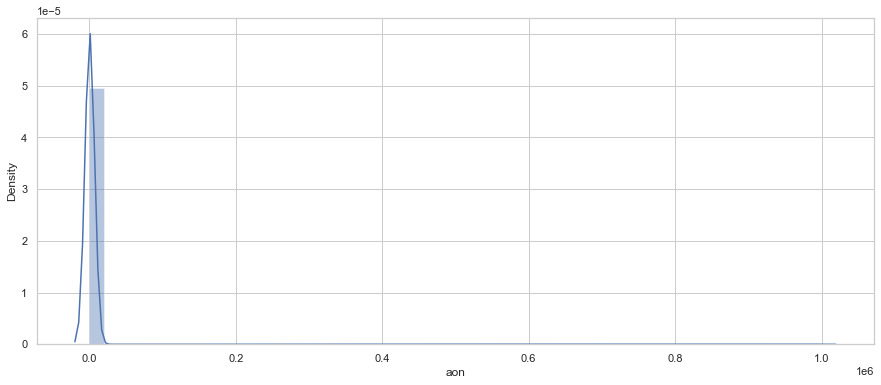

In [1408]:
histogram(data,"aon")

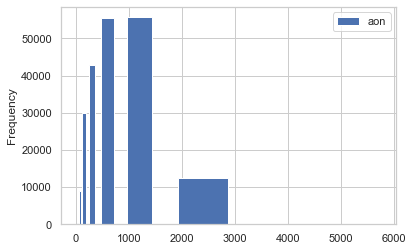

In [1423]:

data[['aon']].plot(kind='hist',bins=[0,50,100,200,400,800,1600,3200,6400],rwidth=0.6)
plt.show()

As per the observation most of the peoples age on network is between 200 to 1500 days

In this dataset there are columns indicating  a perticular property about a person in 30 days and 90 days, i have considered 90 days as its provides more behavioral information about that perticular person. 

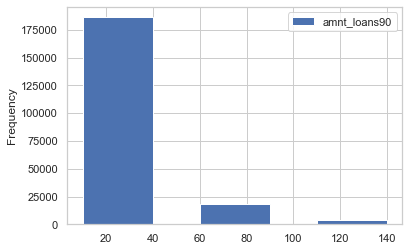

In [1429]:

data[['amnt_loans90']].plot(kind='hist',bins=[0,50,100,150],rwidth=0.6)
plt.show()

The above observation indicates that there are many people who took loan between 0 to 40 in 90 days

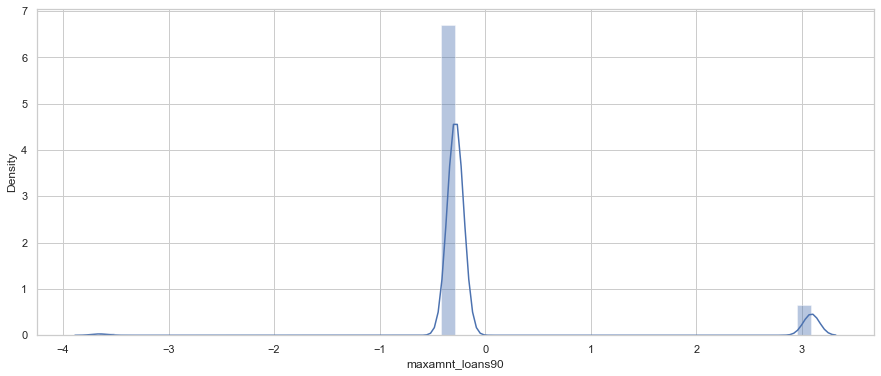

In [1684]:
histogram(data,"maxamnt_loans90")


As there are only two amounts of loan that can be taken by any user i.e 5 and 10 for which thay have to pay 6 and 12 respectively the maximum amount replayed was 6 which was taken by most of user and very few have returned 12 

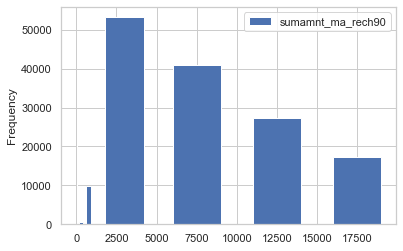

In [1436]:


data[['sumamnt_ma_rech90']].plot(kind='hist',bins=[0,50,100,500,1000,5000,10000,15000,20000],rwidth=0.6)
plt.show()

As per the observation maximun amount was been recharged in main account over 90 days by people were between 2500 to 4000 

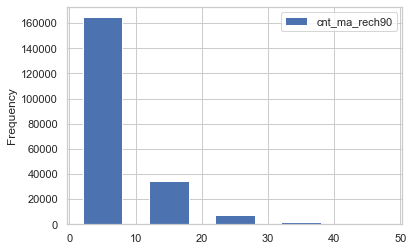

In [1439]:

data[['cnt_ma_rech90']].plot(kind='hist',bins=[0,10,20,30,40,50],rwidth=0.6)
plt.show()

the maximum frequency observed for any person to recharge in main account was 0 to 10 times in 90 days whoch is great indicator

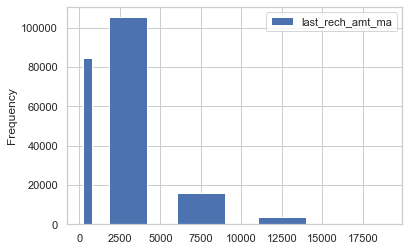

In [1469]:

data[['last_rech_amt_ma']].plot(kind='hist',bins=[0,1000,5000,10000,15000,20000],rwidth=0.6)
plt.show()

As per the observtion the abount between 2000 to 4000 has maximun last recharge frequency


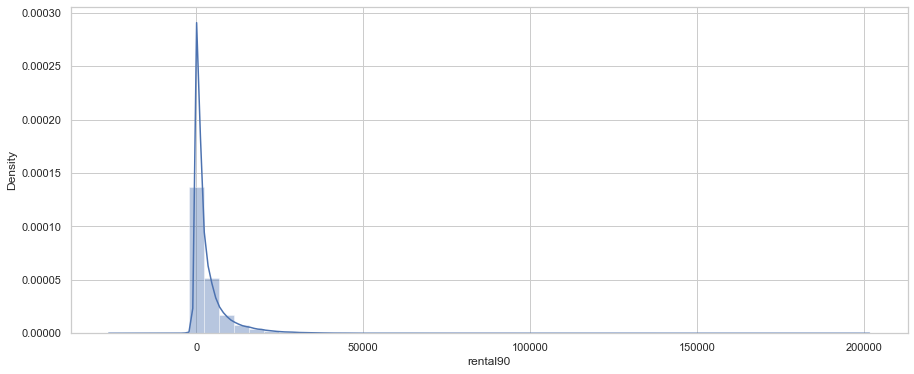

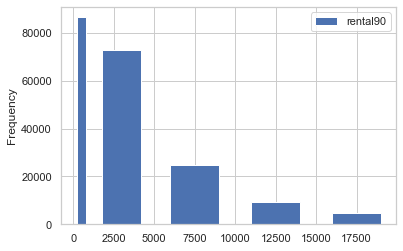

In [1467]:
histogram(data,"rental90")
data[['rental90']].plot(kind='hist',bins=[0,1000,5000,10000,15000,20000],rwidth=0.6)
plt.show()

As per the observation the Average main account balance over last 90 days  was between 0 to  100

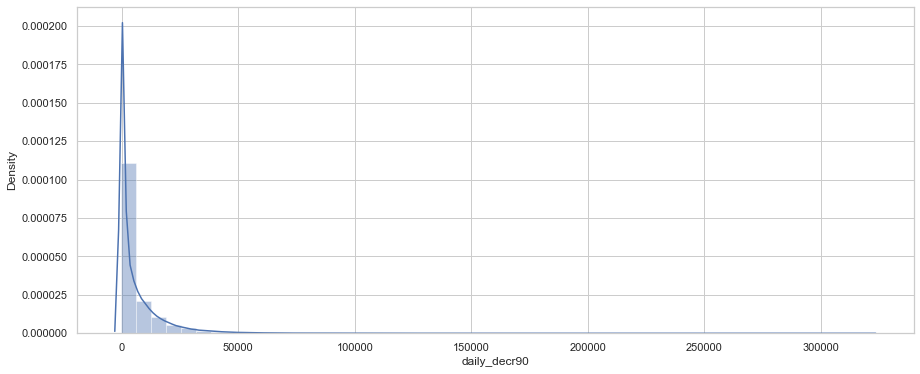

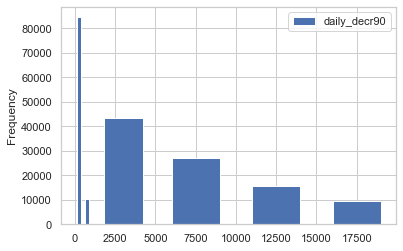

In [1466]:
histogram(data,"daily_decr90")
data[['daily_decr90']].plot(kind='hist',bins=[0,500,1000,5000,10000,15000,20000],rwidth=0.6)
plt.show()


As per observation Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah) was bwtween 0 to 4000

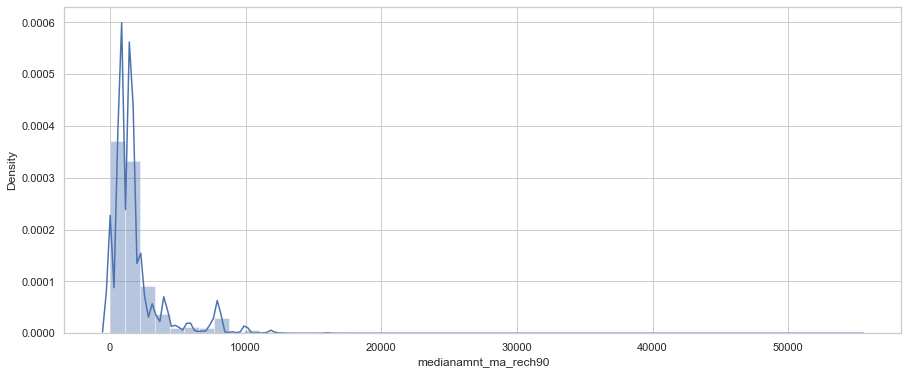

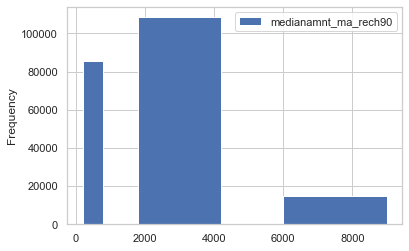

In [1472]:
histogram(data,"medianamnt_ma_rech90")
data[['medianamnt_ma_rech90']].plot(kind='hist',bins=[0,1000,5000,10000],rwidth=0.6)
plt.show()


As per the observation the Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah) was between 2000 to 4000

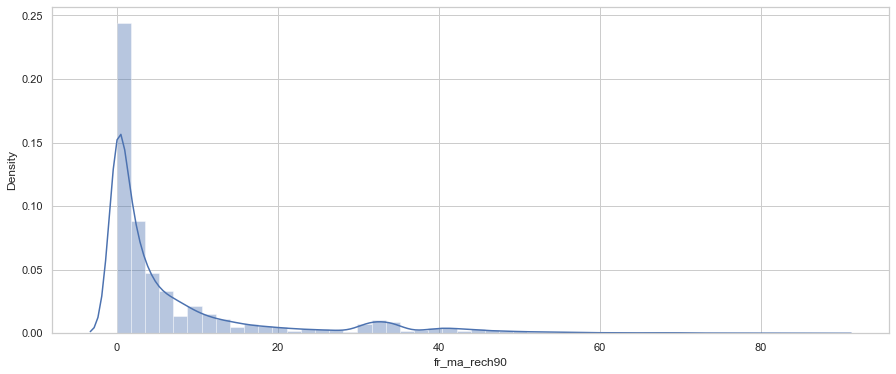

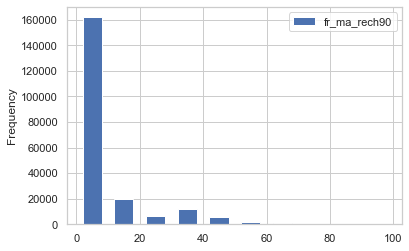

In [1474]:
histogram(data,"fr_ma_rech90")
data[['fr_ma_rech90']].plot(kind='hist',bins=[0,10,20,30,40,50,60,70,80,90,100],rwidth=0.6)
plt.show()

As per observation maximum Frequency of main account recharged in last 90 days was between 0 to 10

Bivariate Analysis

<AxesSubplot:xlabel='label', ylabel='aon'>

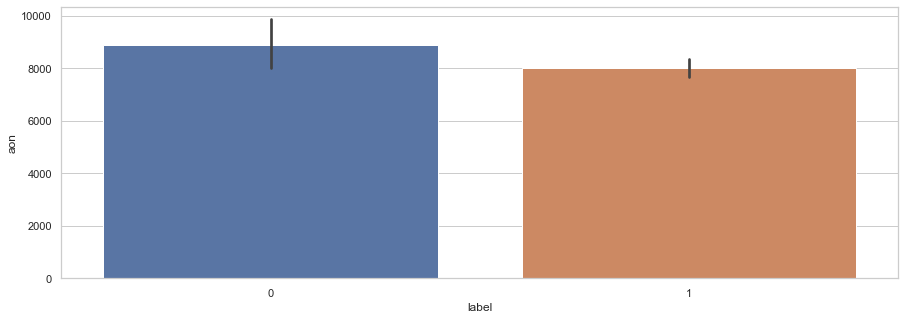

In [1475]:
plt.figure(figsize=(15,5))
sns.barplot(x="label", y="aon",data=data)

The observation states that the age on network of person who didnt pay loan is more than that of the person who paid loan on time

<AxesSubplot:xlabel='label', ylabel='medianmarechprebal30'>

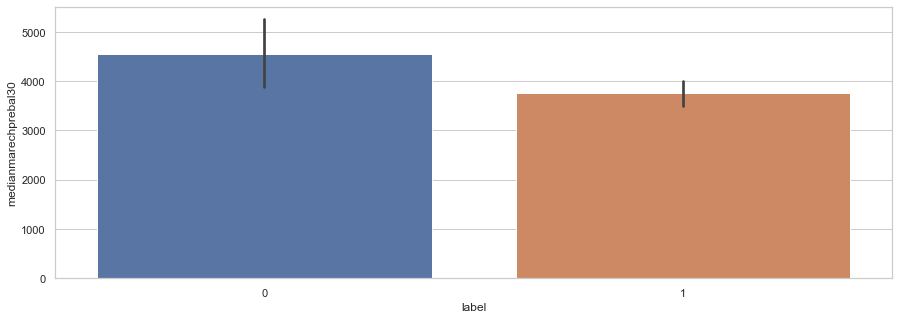

In [1476]:
plt.figure(figsize=(15,5))
sns.barplot(x="label", y="medianmarechprebal30",data=data)

The observation states that the Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah) of person who didnt pay loan is more than that of the person who paid loan on time

<AxesSubplot:xlabel='label', ylabel='amnt_loans90'>

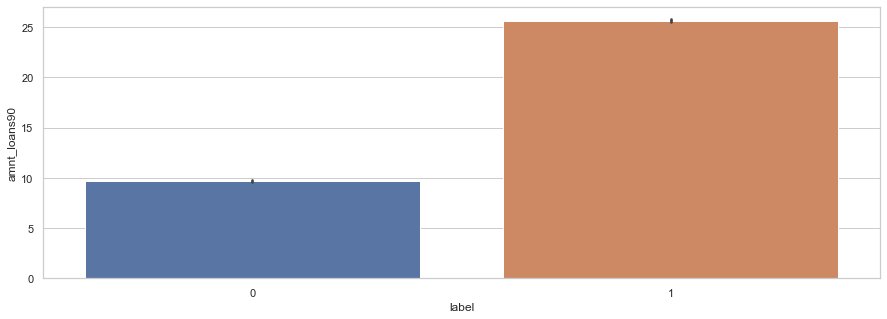

In [1479]:
plt.figure(figsize=(15,5))
sns.barplot(x="label", y="amnt_loans90",data=data)


The observation states that the Total amount of loans taken by user in last 90 days of person who didnt pay loan is less than that of the person who paid loan on time

<AxesSubplot:xlabel='label', ylabel='maxamnt_loans90'>

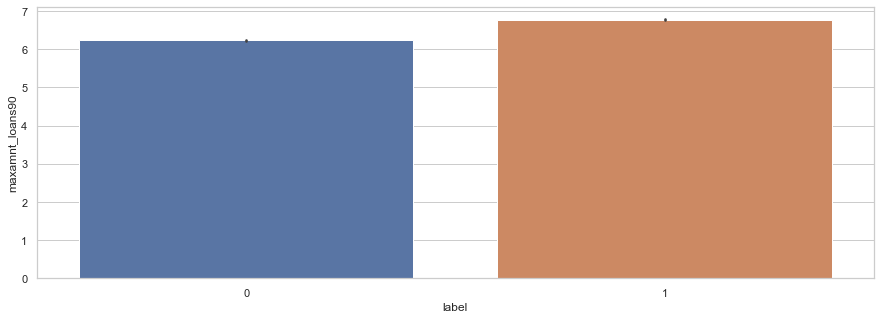

In [1480]:
plt.figure(figsize=(15,5))
sns.barplot(x="label", y="maxamnt_loans90",data=data)



The above observation shows that maximum amount of loan taken by the user in last 90 days of person who didnt pay loan is less than that of the person who paid loan on time

<AxesSubplot:xlabel='label', ylabel='sumamnt_ma_rech90'>

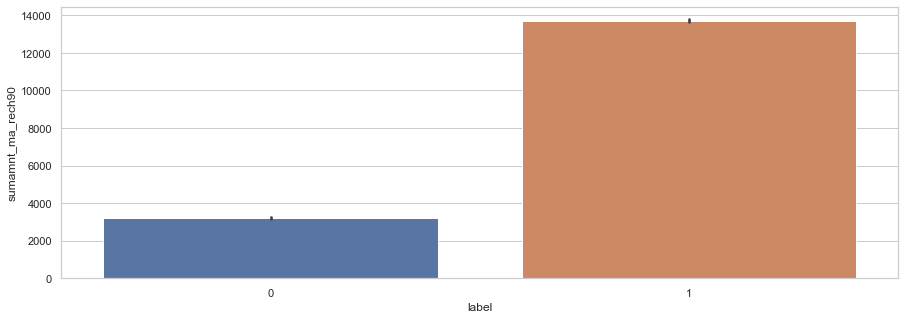

In [1481]:
plt.figure(figsize=(15,5))
sns.barplot(x="label", y="sumamnt_ma_rech90",data=data)



The above onservation says that Total amount of recharge in main account over last 90 days (in Indonasian Rupiah) of person who didnt pay loan is less than that of the person who paid loan on time

<AxesSubplot:xlabel='label', ylabel='cnt_ma_rech90'>

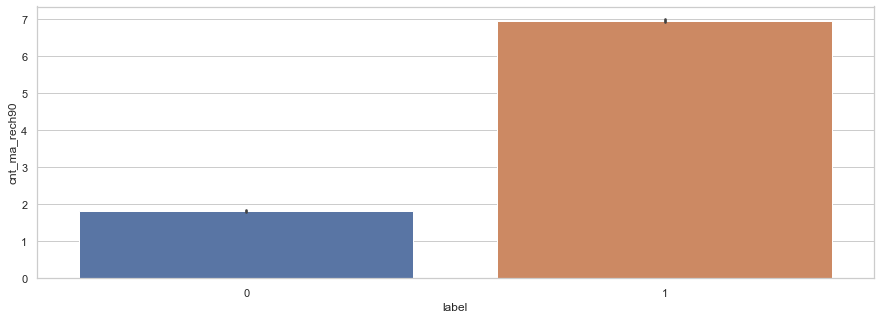

In [1482]:
plt.figure(figsize=(15,5))
sns.barplot(x="label", y="cnt_ma_rech90",data=data)


The above observation says that Number of times main account got recharged in last 90 days of person who didnt pay loan is less than that of the person who paid loan on time

<AxesSubplot:xlabel='label', ylabel='last_rech_amt_ma'>

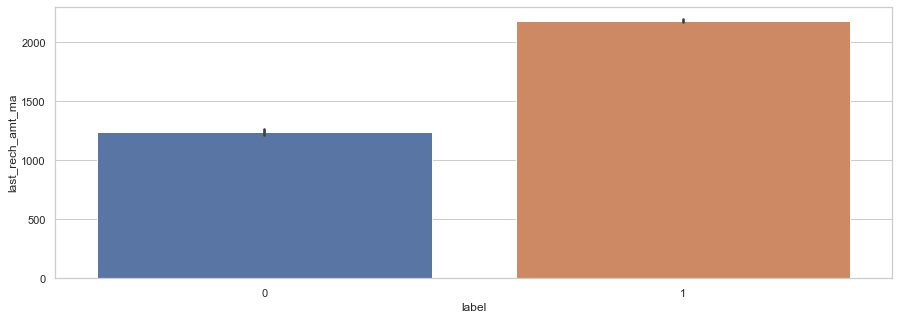

In [1483]:
plt.figure(figsize=(15,5))
sns.barplot(x="label", y="last_rech_amt_ma",data=data)



As the data is imbalanced the observation is based on availabe data the Amount of last recharge of main account (in Indonesian Rupiah) of person who didnt pay loan is less than that of the person who paid loan on time

<AxesSubplot:xlabel='label', ylabel='rental90'>

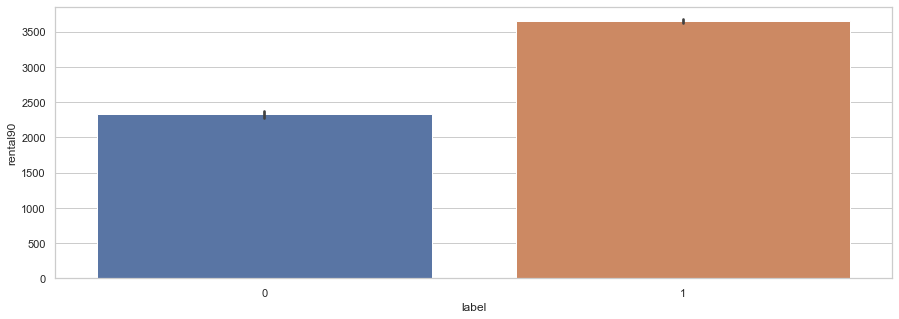

In [1484]:
plt.figure(figsize=(15,5))
sns.barplot(x="label", y="rental90",data=data)


The count of person with Average main account balance over last 90 days of person who didnt pay loan is less than that of the person who paid loan on time

<AxesSubplot:xlabel='label', ylabel='daily_decr90'>

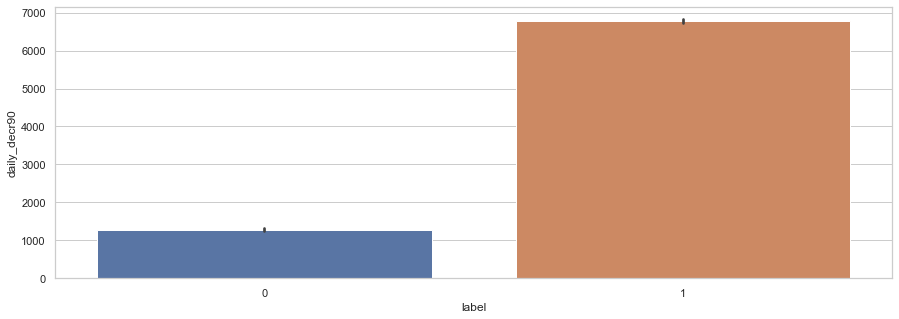

In [1485]:
plt.figure(figsize=(15,5))
sns.barplot(x="label", y="daily_decr90",data=data)


As per the observation the Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah) of person who didnt pay loan is less than that of the person who paid loan on time


<AxesSubplot:xlabel='label', ylabel='medianamnt_ma_rech90'>

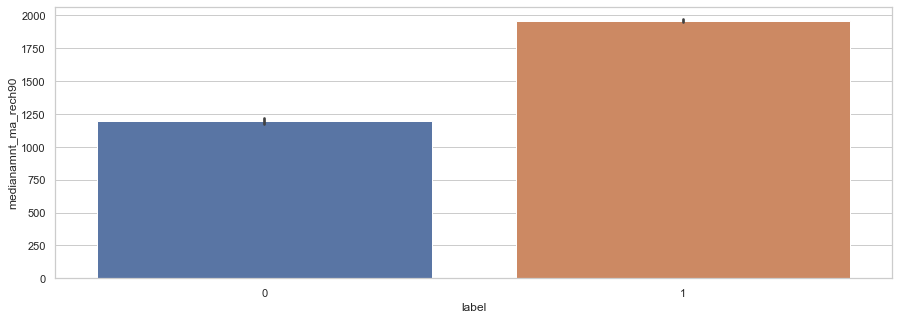

In [1487]:
plt.figure(figsize=(15,5))
sns.barplot(x="label", y="medianamnt_ma_rech90",data=data)


Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah) of person who didnt pay loan is less than that of the person who paid loan on time 

<AxesSubplot:xlabel='label', ylabel='fr_ma_rech90'>

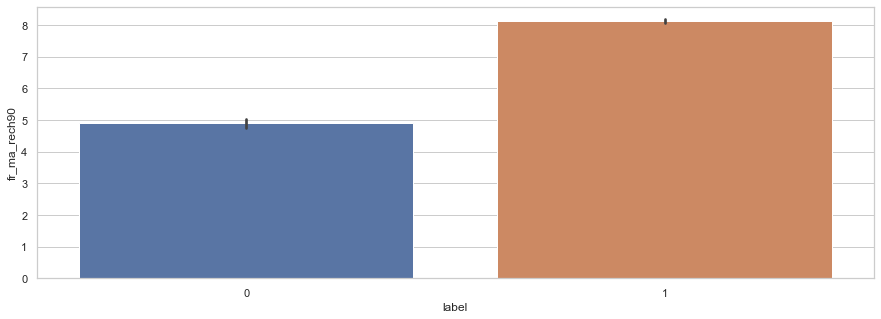

In [1488]:
plt.figure(figsize=(15,5))
sns.barplot(x="label", y="fr_ma_rech90",data=data)



Frequency of data account recharged in last 90 days of person who didnt pay loan is less than that of the person who paid loan on time

Multivariate analysis

<AxesSubplot:>

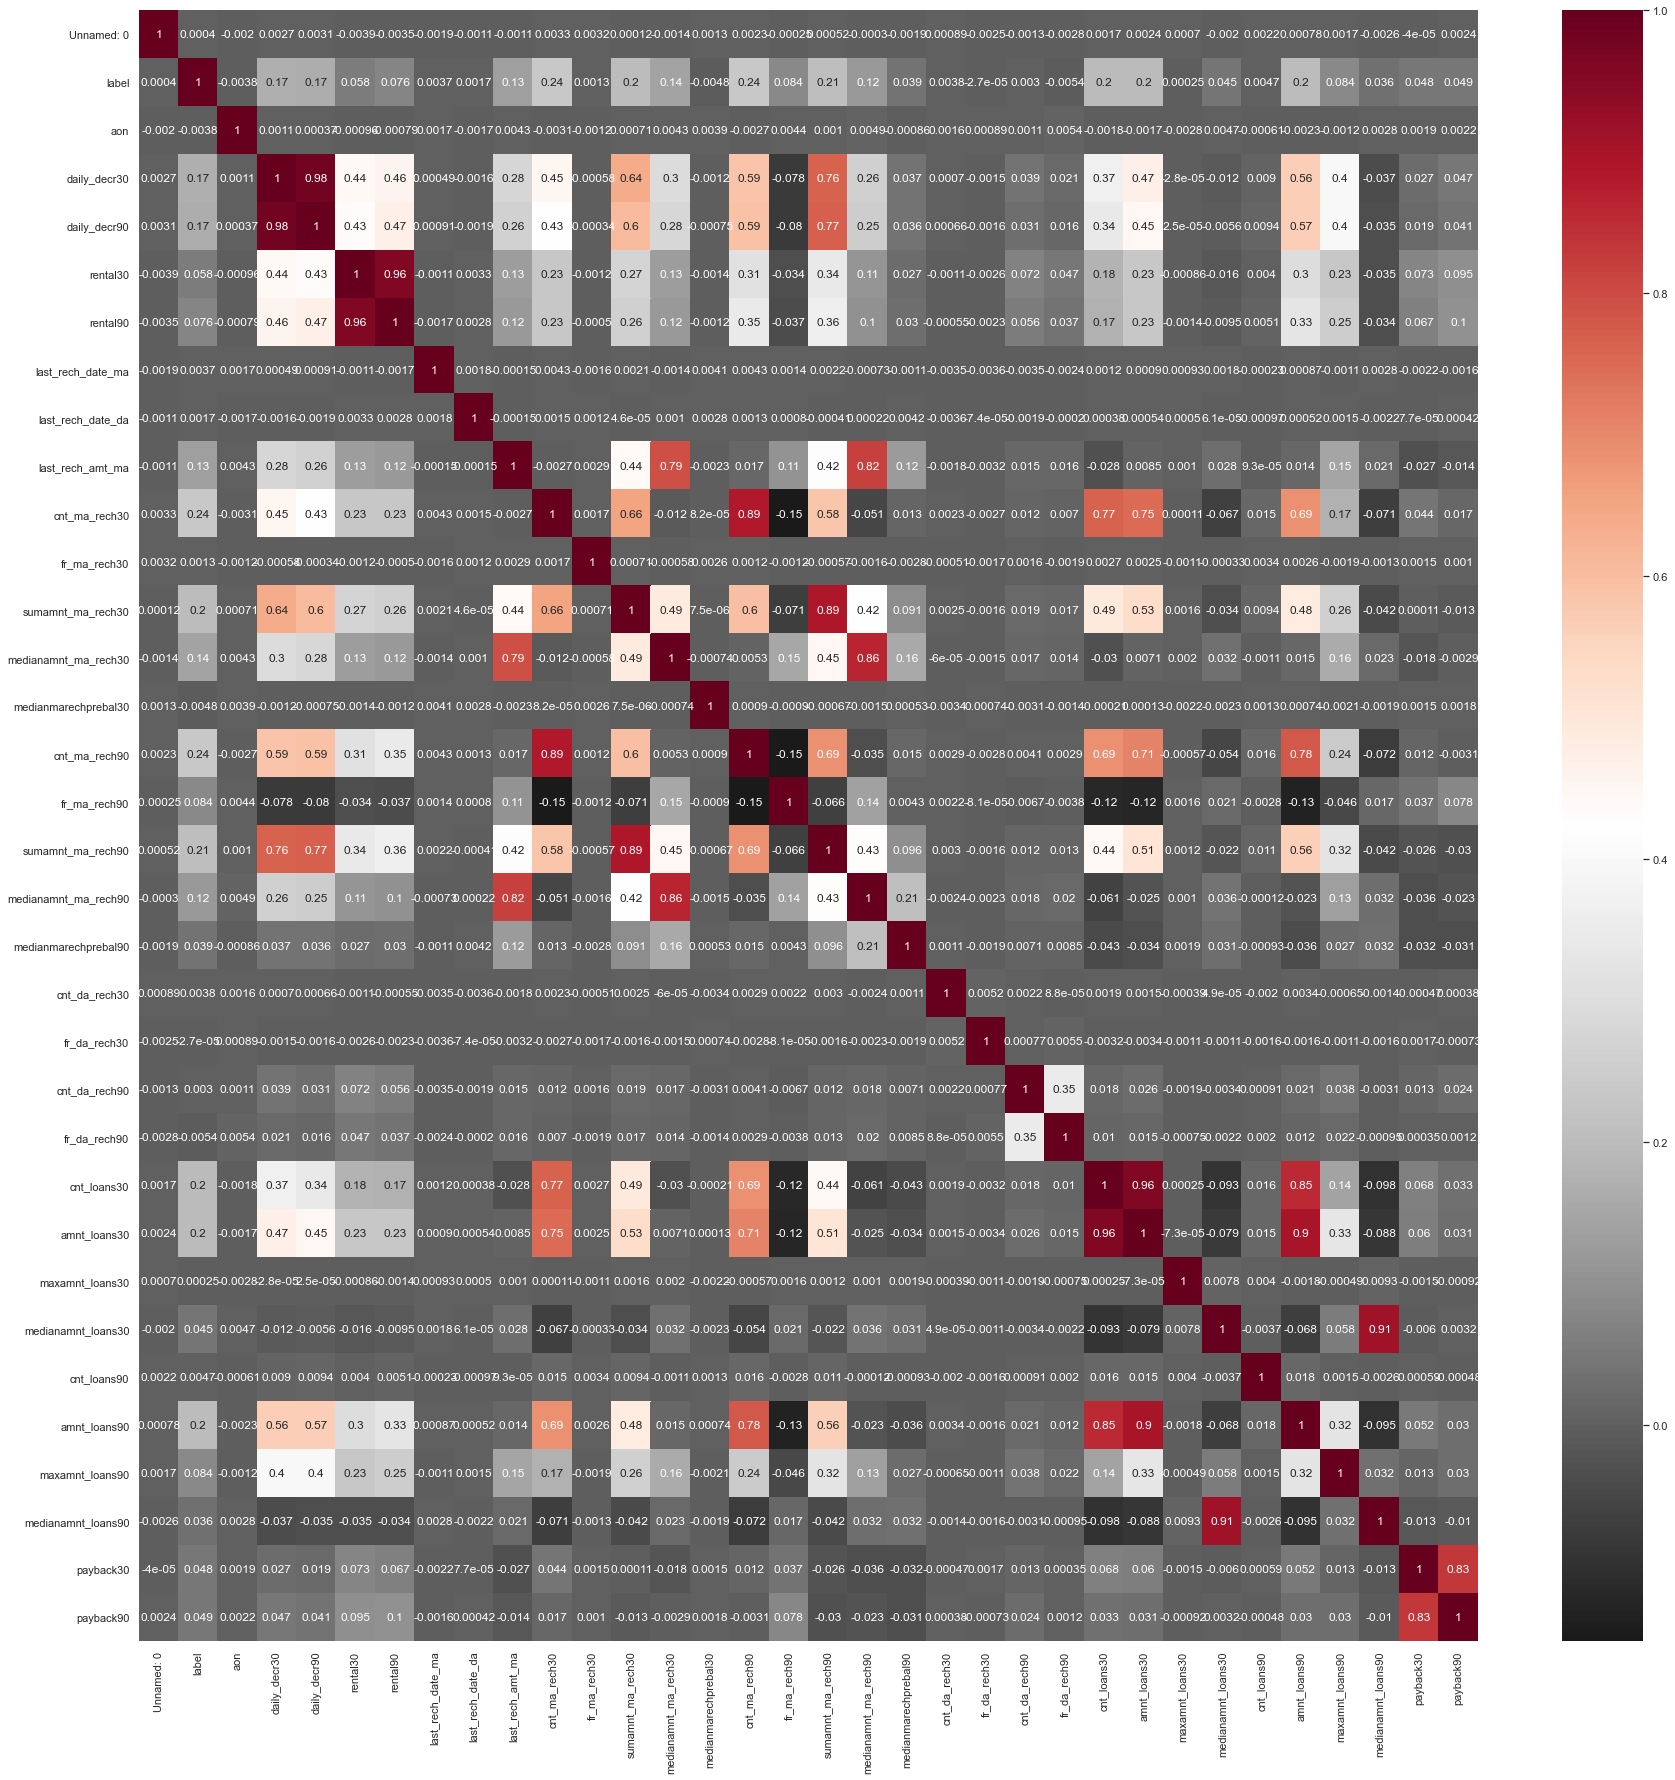

In [1478]:
plt.figure(figsize=(30,30))

sns.heatmap((data.corr()),annot=True,cmap="RdGy_r")

As we can see there are many columns inths dataset  i have considered columns with correlation> 0.5 as a threshold for performing analysis


cnt_loans30              
amnt_loans90             
maxamnt_loans90          
amnt_loans30             
label                    
sumamnt_ma_rech90        
cnt_ma_rech90            
medianamnt_ma_rech30     
sumamnt_ma_rech30        
cnt_ma_rech30            
last_rech_amt_ma         
rental90                 
rental30                 
daily_decr90             
daily_decr30             
medianamnt_ma_rech90     
fr_ma_rech90            


These are the columns with higest correlation about 0.5 threshold

Handling outliers and skewness

<AxesSubplot:>

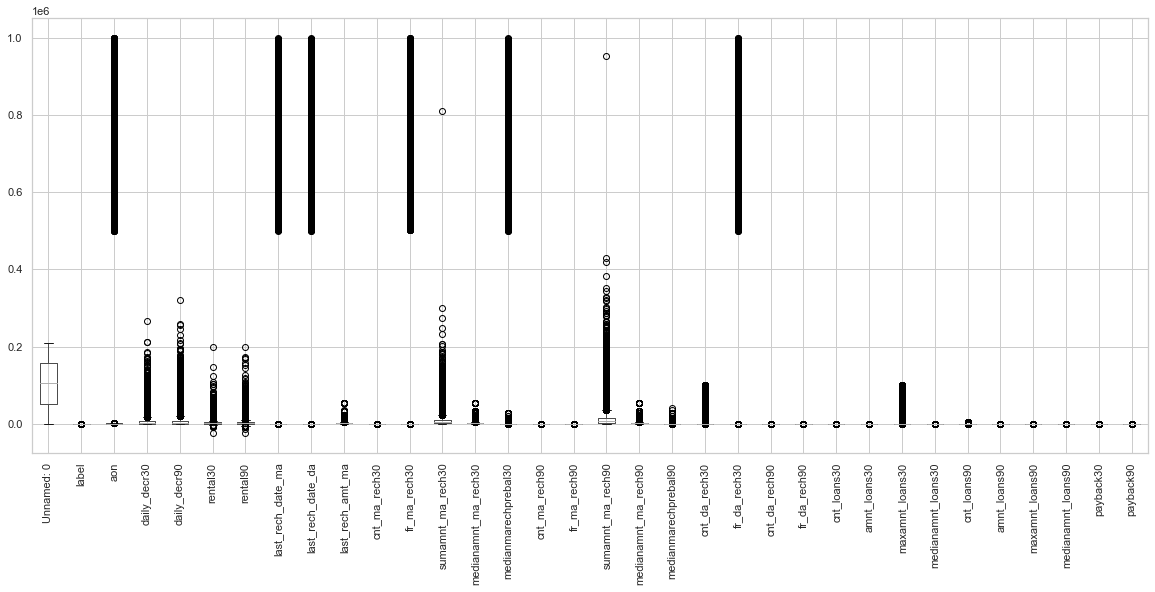

In [1490]:
data.boxplot( rot = 90, figsize=(20,8))

In [1491]:
gg=data.skew()

In [1492]:
# finding columns with skewness above 0.5
(gg>0.5).sort_values()

Unnamed: 0              False
label                   False
medianmarechprebal90     True
cnt_da_rech30            True
fr_da_rech30             True
cnt_da_rech90            True
fr_da_rech90             True
cnt_loans30              True
amnt_loans30             True
maxamnt_loans30          True
medianamnt_loans30       True
cnt_loans90              True
amnt_loans90             True
maxamnt_loans90          True
medianamnt_loans90       True
medianamnt_ma_rech90     True
sumamnt_ma_rech90        True
fr_ma_rech90             True
cnt_ma_rech90            True
medianmarechprebal30     True
medianamnt_ma_rech30     True
sumamnt_ma_rech30        True
fr_ma_rech30             True
cnt_ma_rech30            True
last_rech_amt_ma         True
last_rech_date_da        True
last_rech_date_ma        True
rental90                 True
rental30                 True
daily_decr90             True
daily_decr30             True
aon                      True
payback30                True
payback90 

In [1493]:
data["rental30"].describe()

count    209593.000000
mean       2692.581910
std        4308.586781
min      -23737.140000
25%         280.420000
50%        1083.570000
75%        3356.940000
max      198926.110000
Name: rental30, dtype: float64

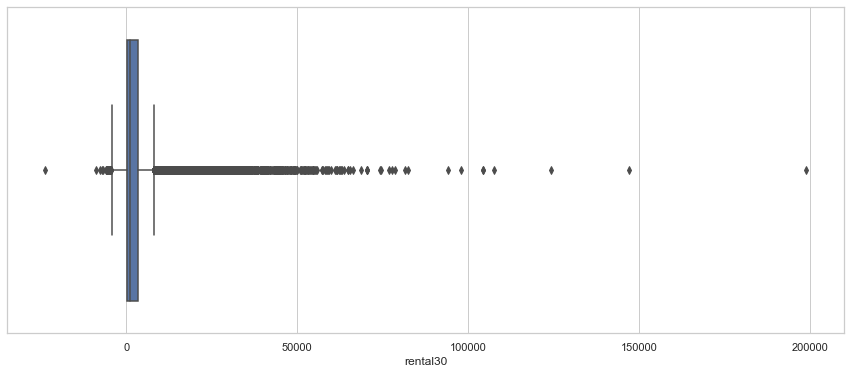

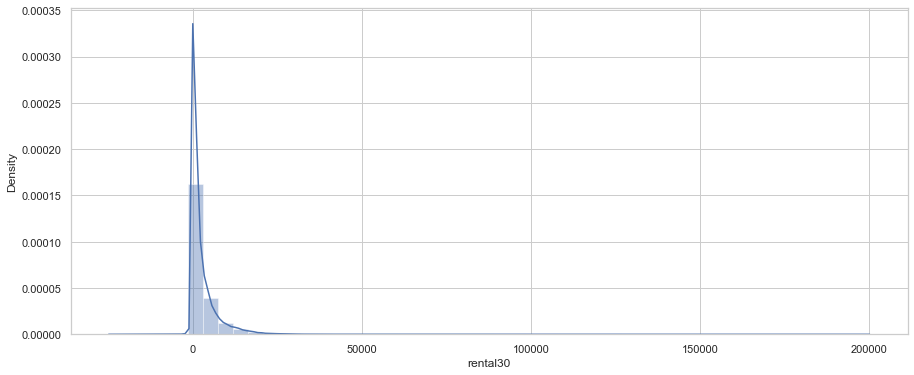

In [1494]:
boxplot(data,"rental30")
histogram(data,"rental30")

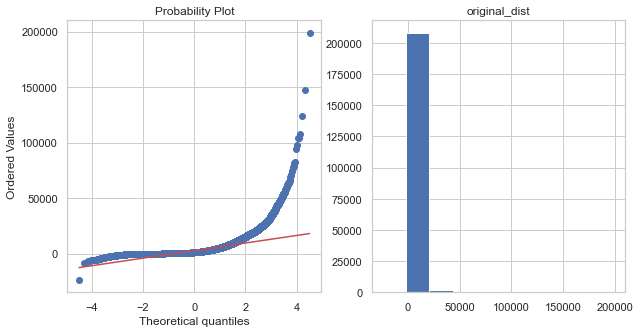

In [1495]:
original_dist(data,"rental30")

In [1496]:
outlier_IQR3(data,"rental30")

(-8949.14, 12586.5)

In [1497]:
data.loc[data["rental30"]>=12586.5,"rental30"] =12586.5

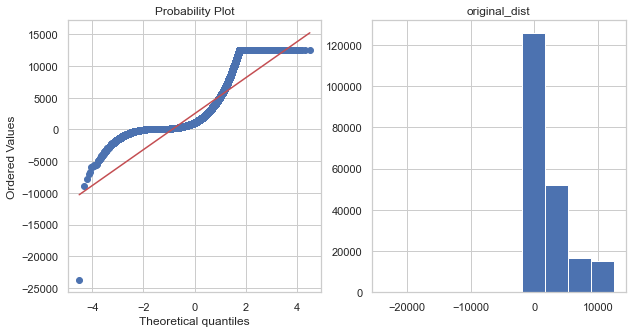

In [1499]:
original_dist(data,"rental30")

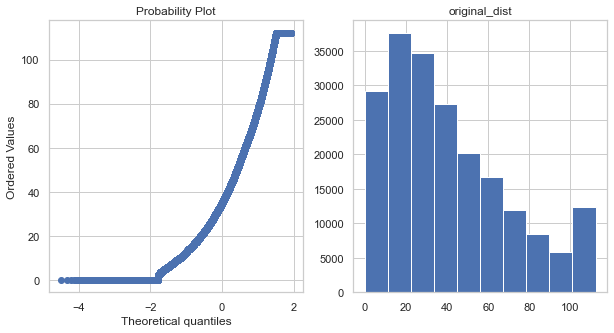

In [1500]:
squareroot_transform(data,"rental30")



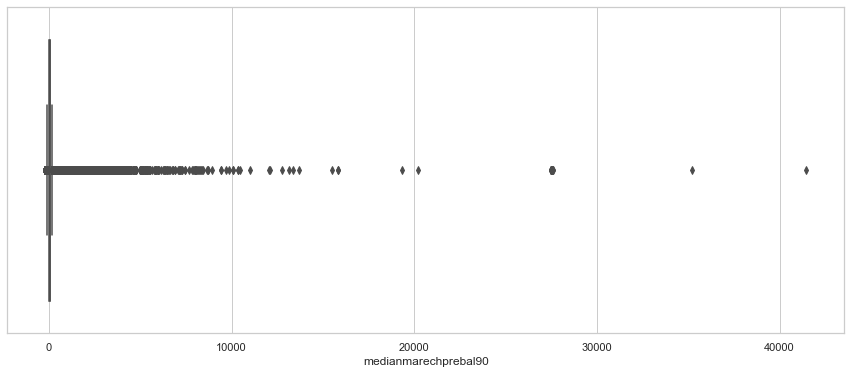

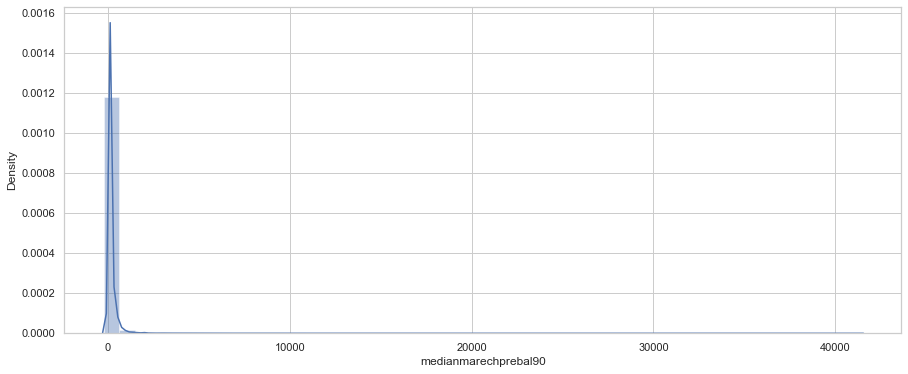

In [1501]:
boxplot(data,"medianmarechprebal90")
histogram(data,"medianmarechprebal90")

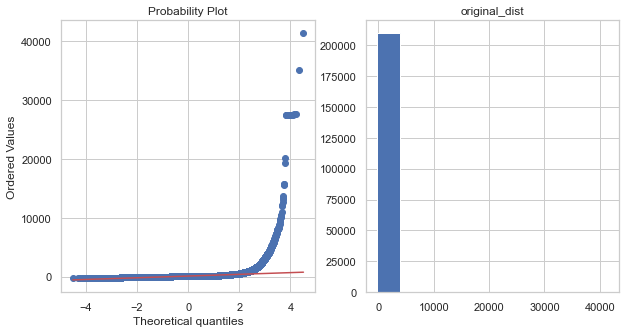

In [1502]:
original_dist(data,"medianmarechprebal90")

In [1503]:
outlier_IQR3(data,"medianmarechprebal90")

(-179.53000000000017, 273.4400000000005)

In [1504]:
data.loc[data["medianmarechprebal90"]>273.44,"medianmarechprebal90"] =273.44

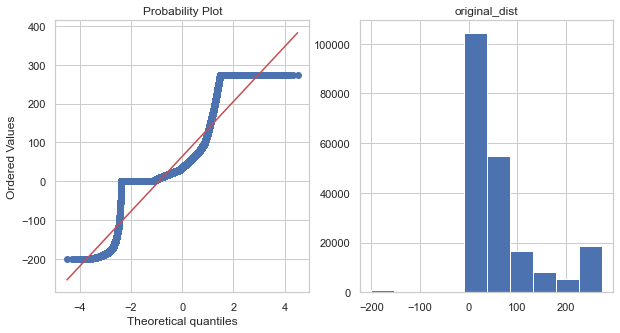

In [1505]:
original_dist(data,"medianmarechprebal90")

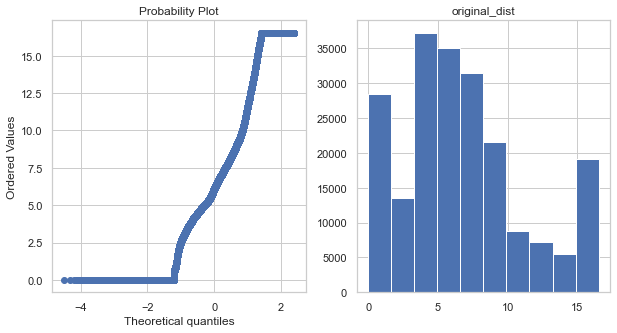

In [1506]:
squareroot_transform(data,"medianmarechprebal90")



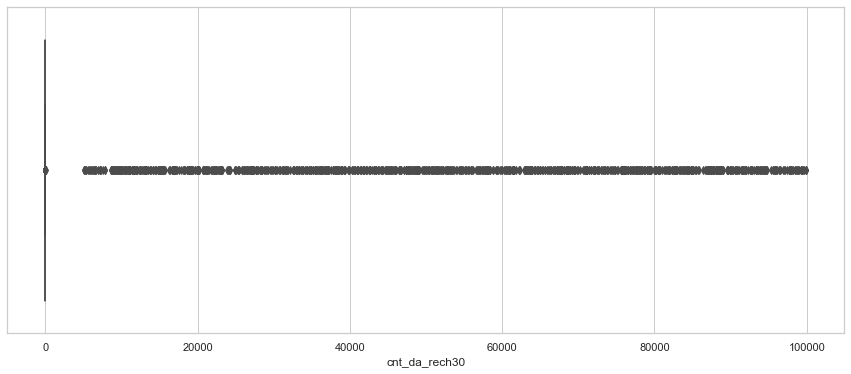

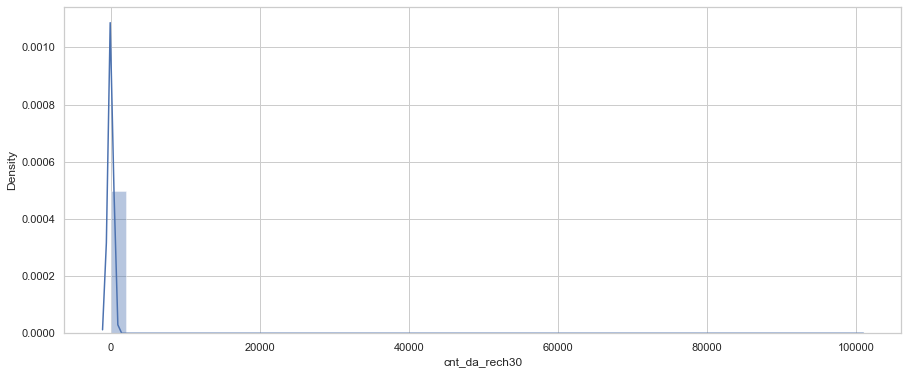

In [1507]:
boxplot(data,"cnt_da_rech30")
histogram(data,"cnt_da_rech30")

In [1508]:
outlier_normally(data,"cnt_da_rech30")

(-12289.115823537928, 12814.272042881488)

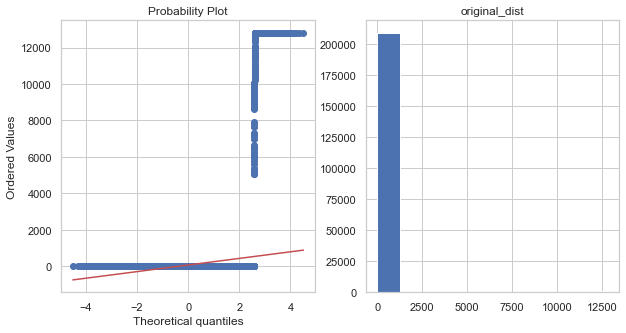

In [1509]:
data.loc[data["cnt_da_rech30"]>12814.272042881488,"cnt_da_rech30"] =12814.272042881488
original_dist(data,"cnt_da_rech30")

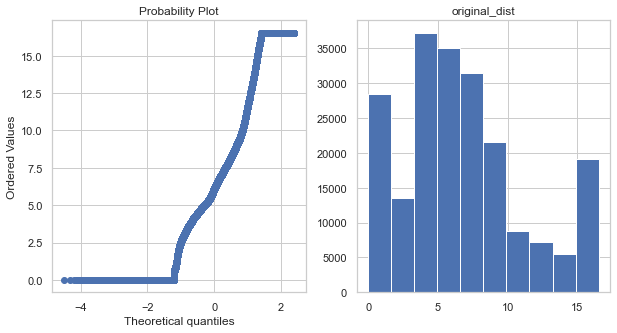

In [1510]:
squareroot_transform(data,"medianmarechprebal90")


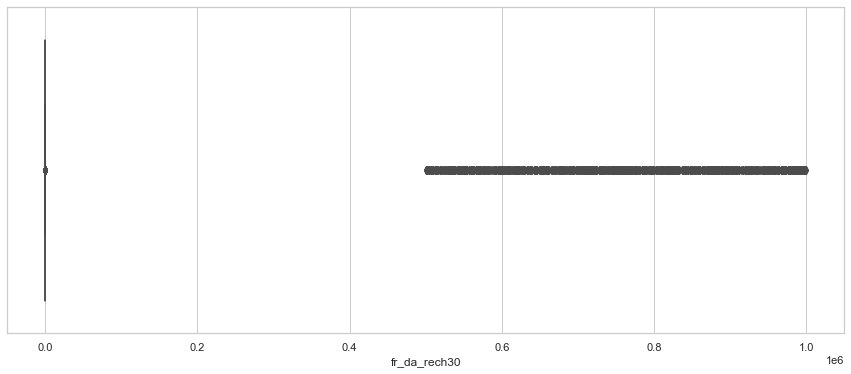

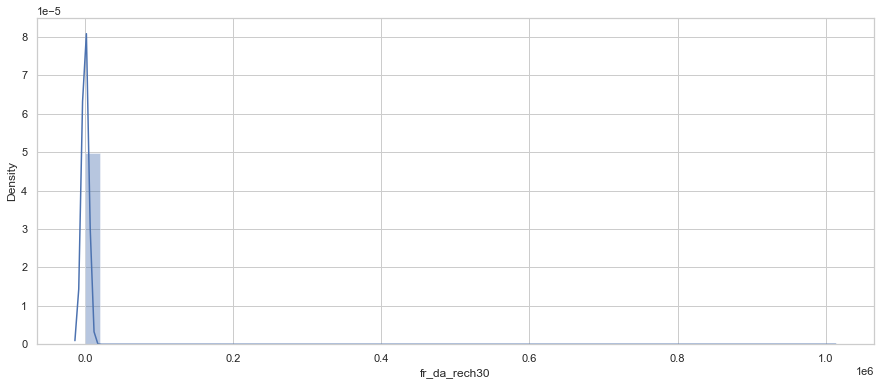

In [1511]:
boxplot(data,"fr_da_rech30")
histogram(data,"fr_da_rech30")

In [1512]:
outlier_normally(data,"fr_da_rech30")


(-157906.75049064896, 165405.73938389245)

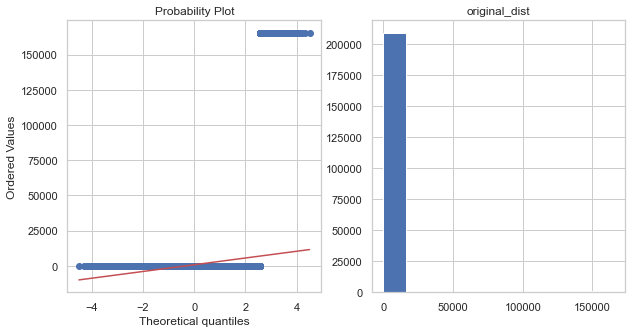

In [1513]:

data.loc[data["fr_da_rech30"]>165405.73938389245,"fr_da_rech30"] =165405.73938389245
original_dist(data,"fr_da_rech30")

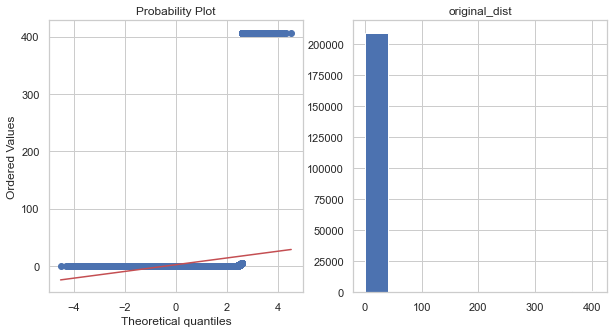

In [1515]:
squareroot_transform(data,"fr_da_rech30")

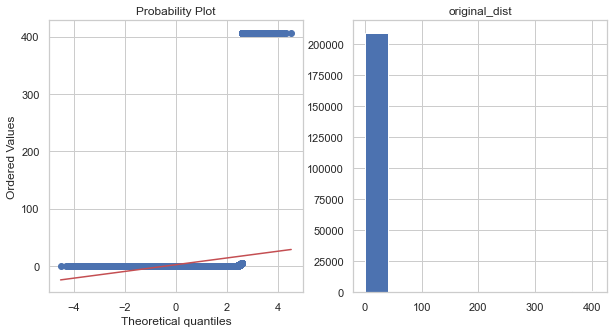

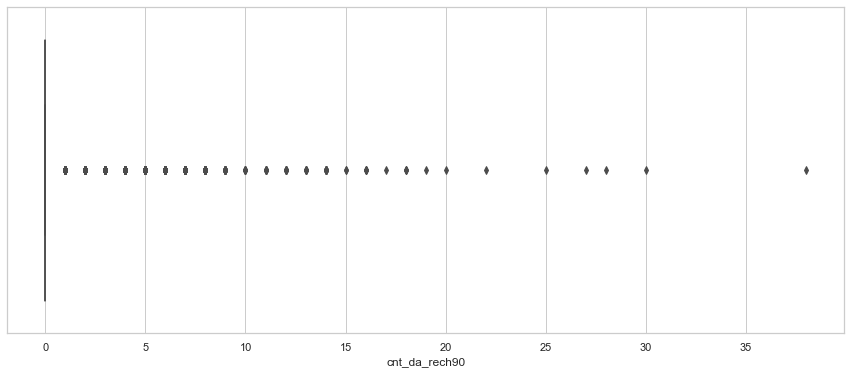

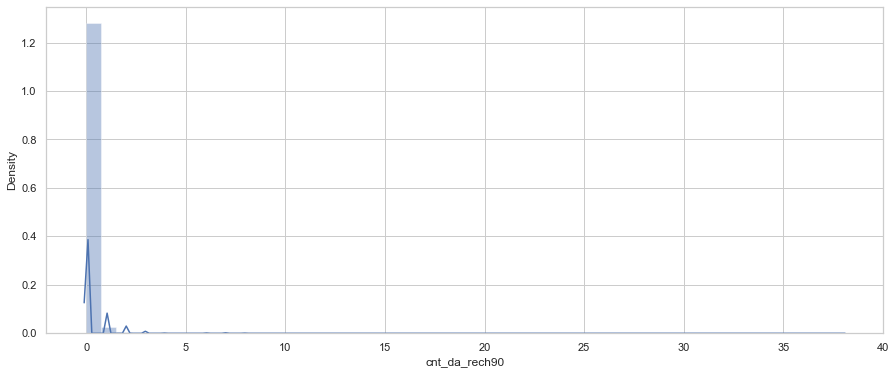

In [1516]:
boxplot(data,"cnt_da_rech90")
histogram(data,"cnt_da_rech90")

In [1517]:
outlier_normally(data,"cnt_da_rech90")

(-1.151172265596897, 1.2341616784112561)

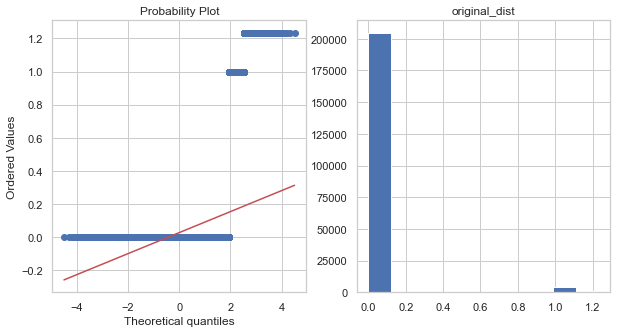

In [1518]:

data.loc[data["cnt_da_rech90"]>1.2341616784112561,"cnt_da_rech90"] =1.2341616784112561
original_dist(data,"cnt_da_rech90")

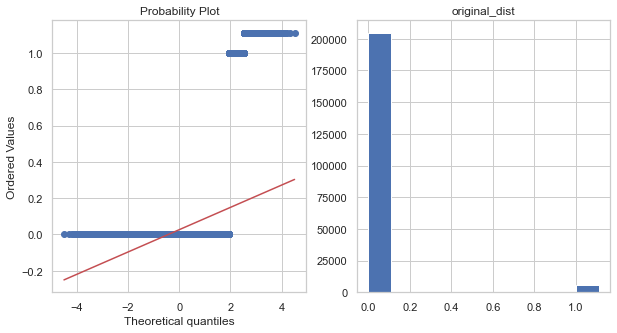

In [1520]:
squareroot_transform(data,"cnt_da_rech90")

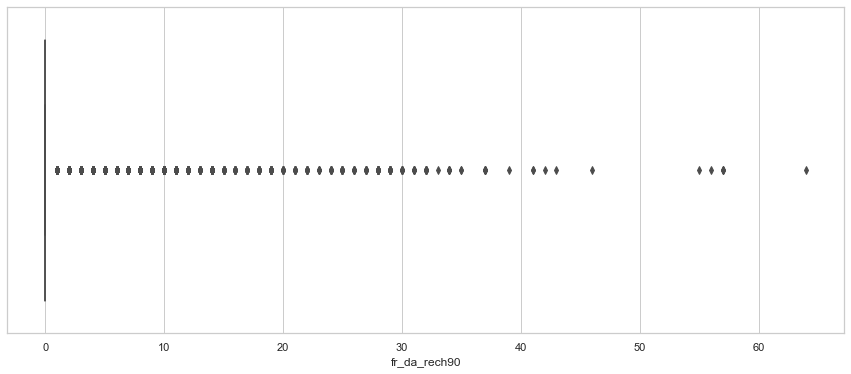

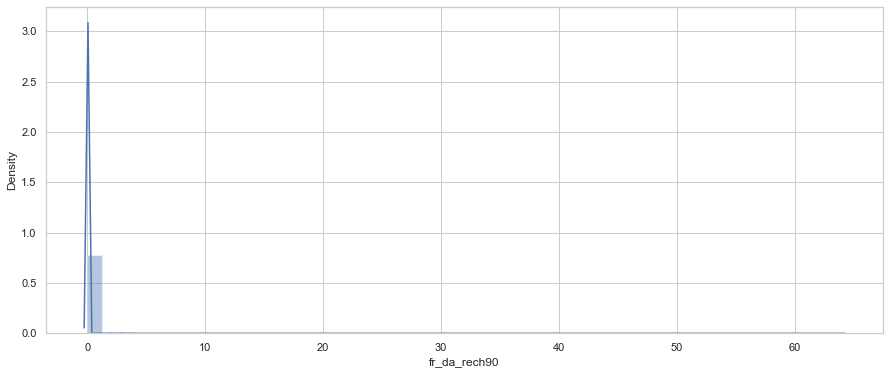

In [1521]:
boxplot(data,"fr_da_rech90")
histogram(data,"fr_da_rech90")

In [1522]:
outlier_normally(data,"fr_da_rech90")

(-2.8084448978023717, 2.8998697068370243)

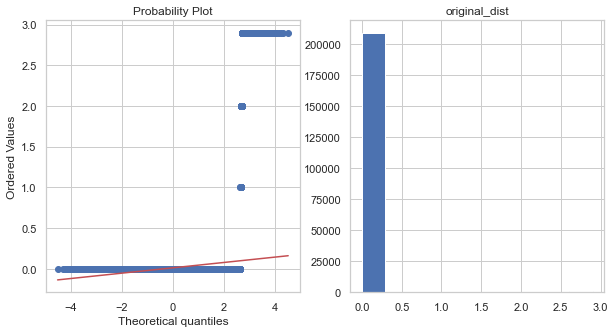

In [1523]:

data.loc[data["fr_da_rech90"]>2.8998697068370243,"fr_da_rech90"] =2.8998697068370243
original_dist(data,"fr_da_rech90")

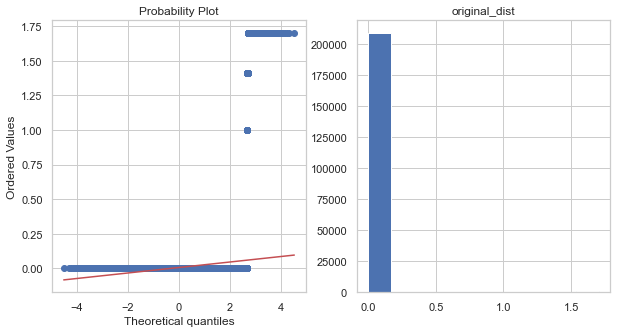

In [1524]:
squareroot_transform(data,"fr_da_rech90")

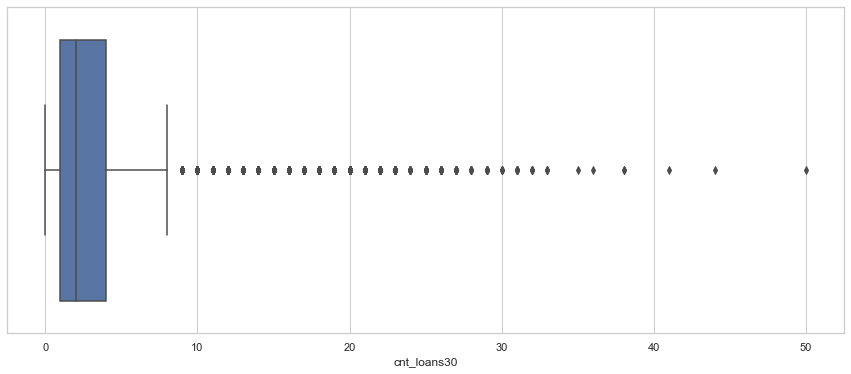

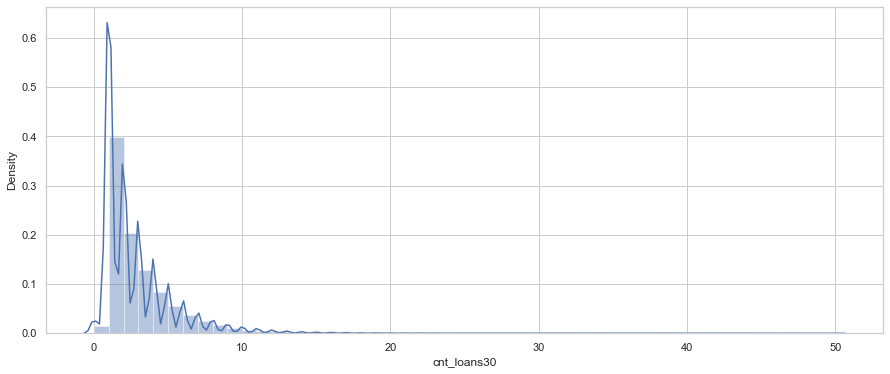

In [1525]:
boxplot(data,"cnt_loans30")
histogram(data,"cnt_loans30")

In [1526]:
outlier_normally(data,"cnt_loans30")

(-4.904525938720186, 10.422486939326122)

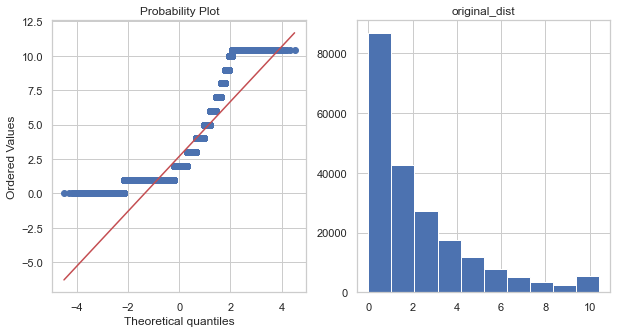

In [1527]:

data.loc[data["cnt_loans30"]>10.422486939326122,"cnt_loans30"] =10.422486939326122
original_dist(data,"cnt_loans30")

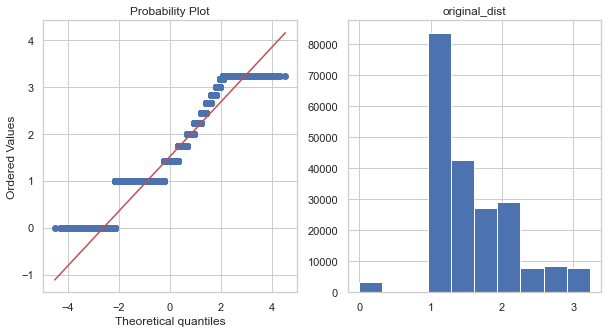

In [1528]:
squareroot_transform(data,"cnt_loans30")

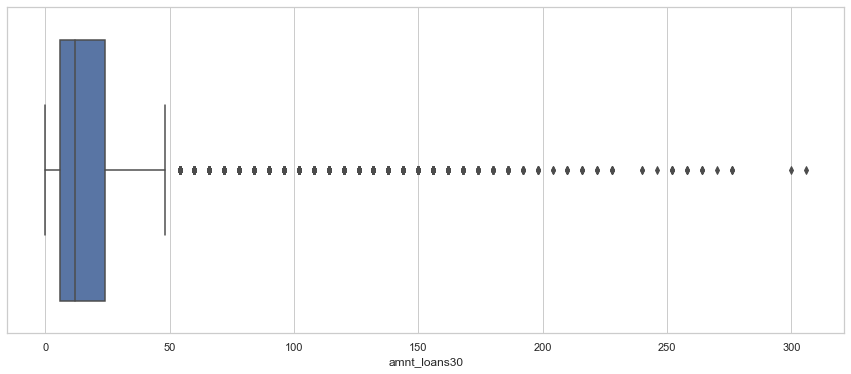

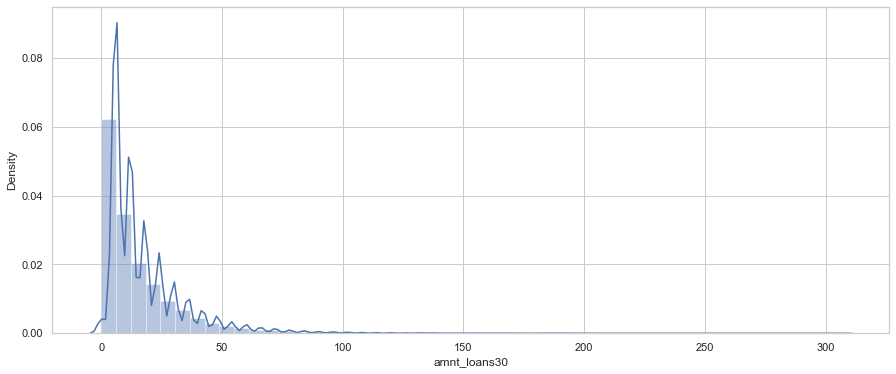

In [1529]:
boxplot(data,"amnt_loans30")
histogram(data,"amnt_loans30")

In [1530]:
outlier_normally(data,"amnt_loans30")

(-34.18720281775619, 70.09124541459863)

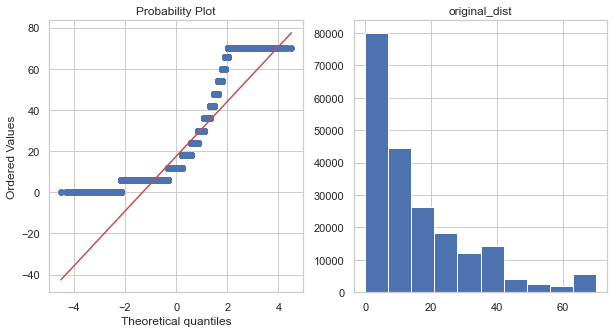

In [1531]:

data.loc[data["amnt_loans30"]>70.09124541459863,"amnt_loans30"] =70.09124541459863
original_dist(data,"amnt_loans30")

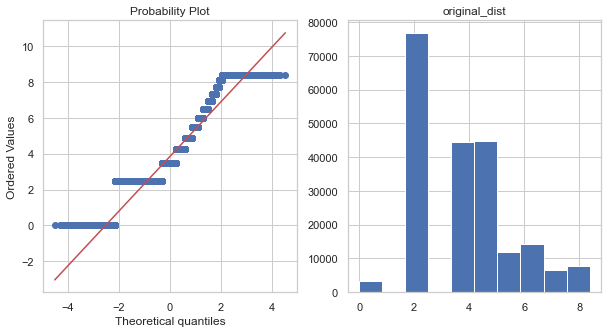

In [1532]:
squareroot_transform(data,"amnt_loans30")

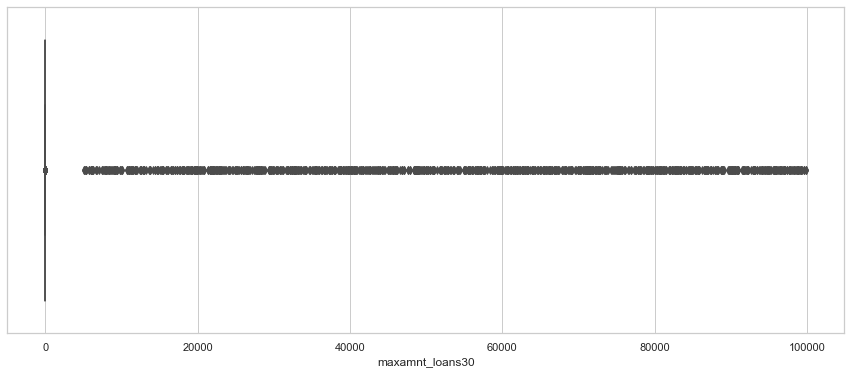

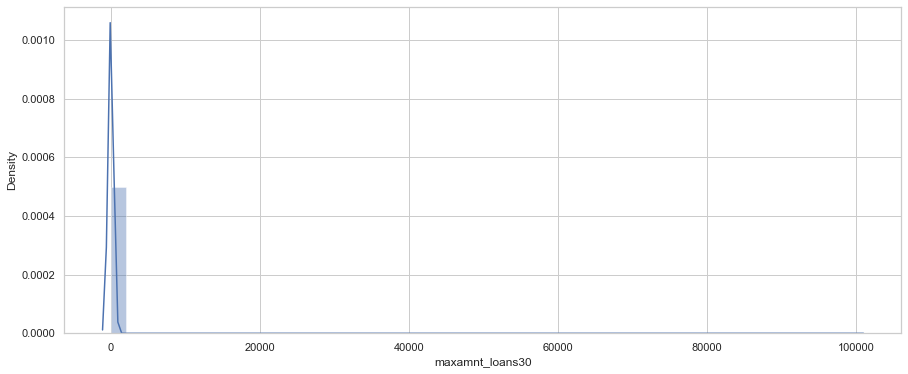

In [1533]:
boxplot(data,"maxamnt_loans30")
histogram(data,"maxamnt_loans30")

In [1534]:
outlier_normally(data,"maxamnt_loans30")

(-12461.13519566986, 13010.452689654416)

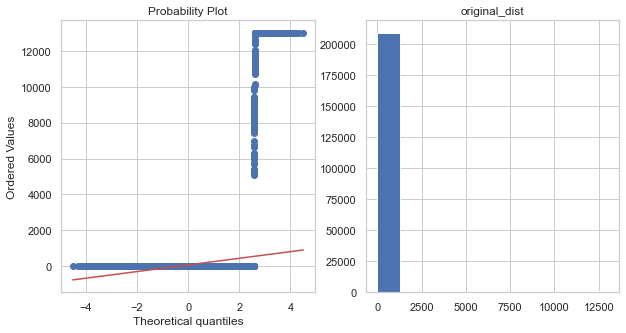

In [1535]:


data.loc[data["maxamnt_loans30"]>13010.452689654416,"maxamnt_loans30"] =13010.452689654416
original_dist(data,"maxamnt_loans30")

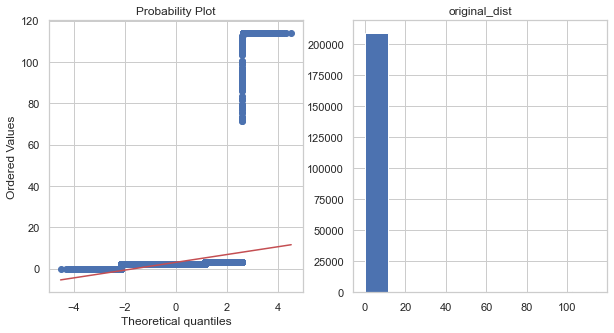

In [1536]:
squareroot_transform(data,"maxamnt_loans30")

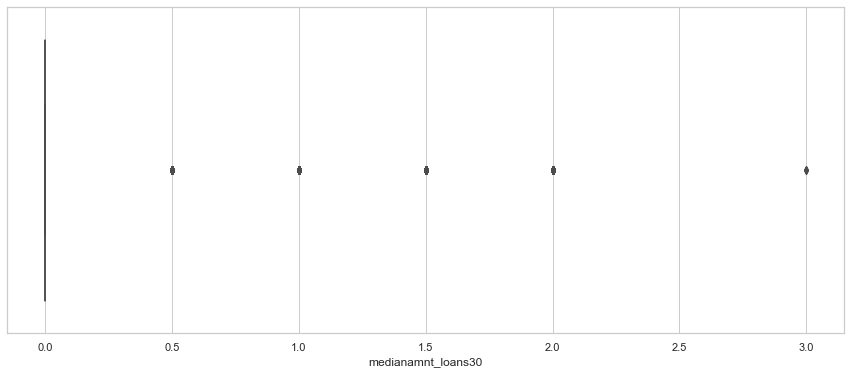

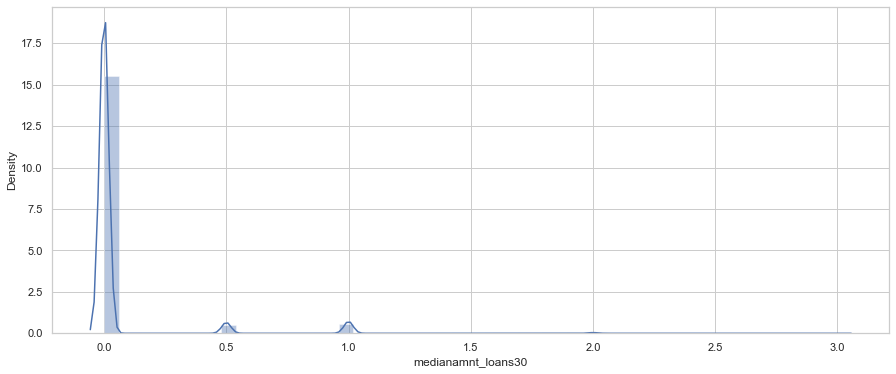

In [1537]:
boxplot(data,"medianamnt_loans30")
histogram(data,"medianamnt_loans30")

In [1538]:
outlier_normally(data,"medianamnt_loans30")

(-0.600087381373549, 0.7081444252633735)

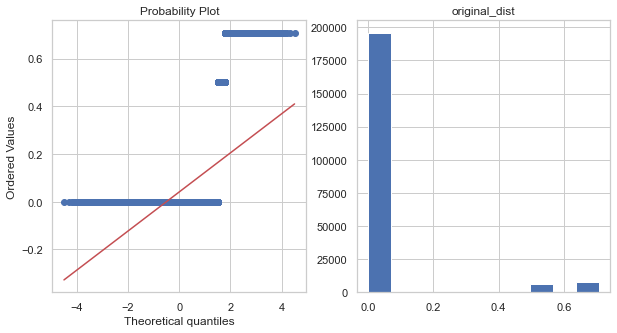

In [1539]:

data.loc[data["medianamnt_loans30"]>0.7081444252633735,"medianamnt_loans30"] =0.7081444252633735
original_dist(data,"medianamnt_loans30")

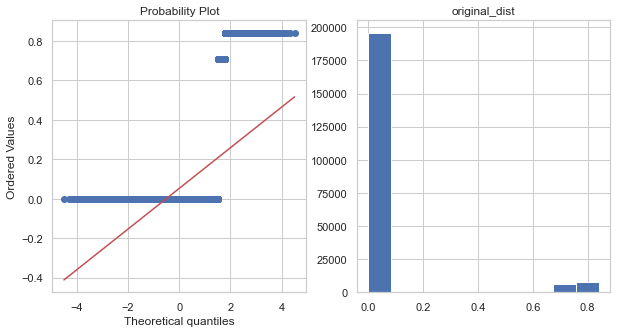

In [1540]:
squareroot_transform(data,"medianamnt_loans30")

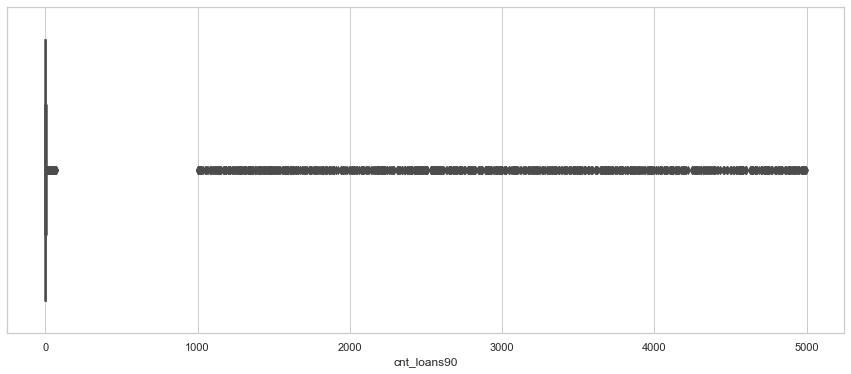

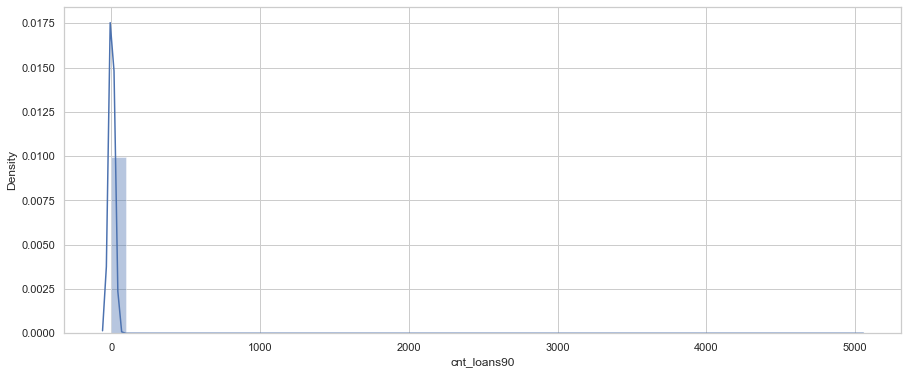

In [1541]:
boxplot(data,"cnt_loans90")
histogram(data,"cnt_loans90")

In [1542]:
outlier_normally(data,"cnt_loans90")

(-655.8713492150791, 692.9131874281202)

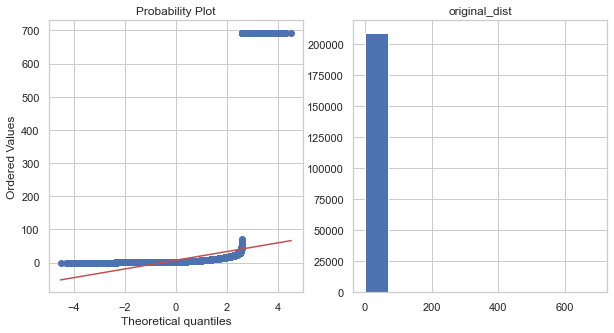

In [1543]:

data.loc[data["cnt_loans90"]>692.9131874281202,"cnt_loans90"] =692.9131874281202
original_dist(data,"cnt_loans90")

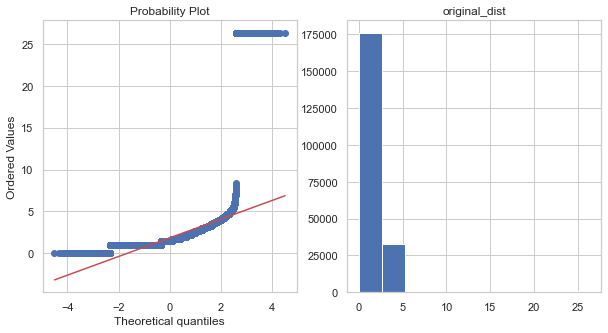

In [1544]:
squareroot_transform(data,"cnt_loans90")

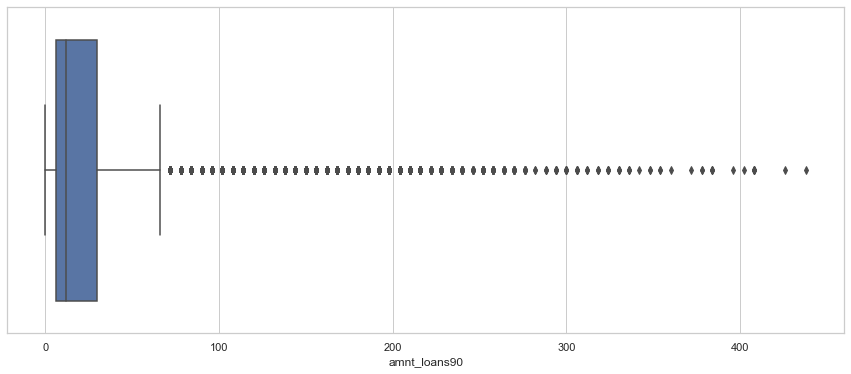

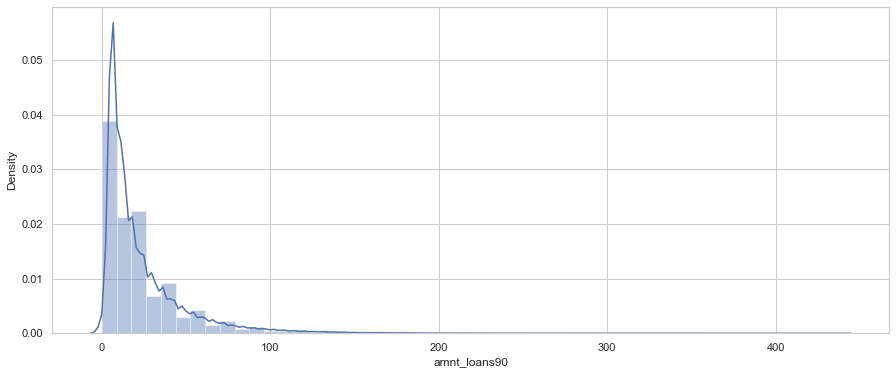

In [1545]:
boxplot(data,"amnt_loans90")
histogram(data,"amnt_loans90")

In [1546]:
outlier_normally(data,"amnt_loans90")

(-55.76418460865331, 103.05498153412314)

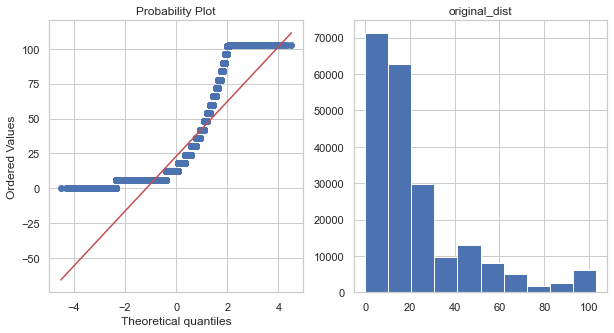

In [1547]:

data.loc[data["amnt_loans90"]>103.05498153412314,"amnt_loans90"] =103.05498153412314
original_dist(data,"amnt_loans90")

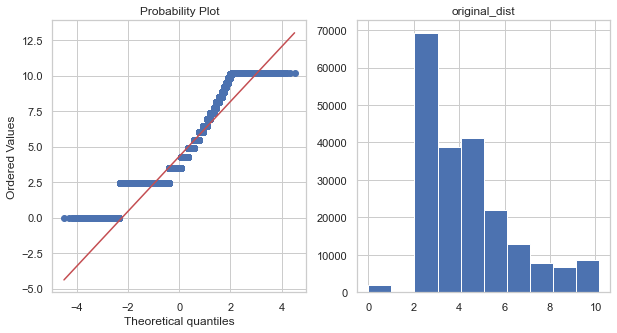

In [1548]:
squareroot_transform(data,"amnt_loans90")

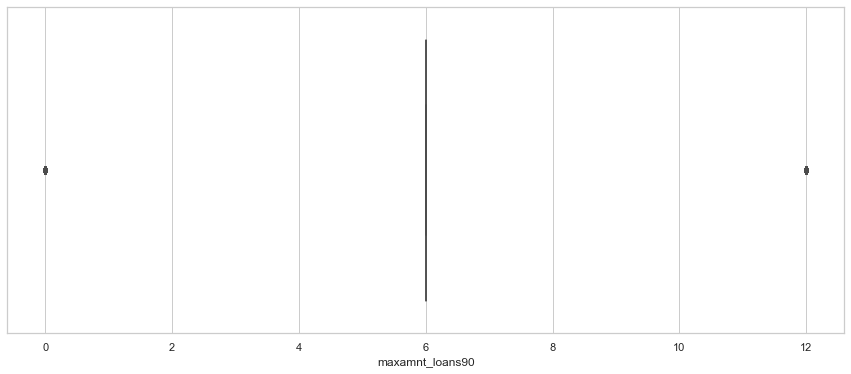

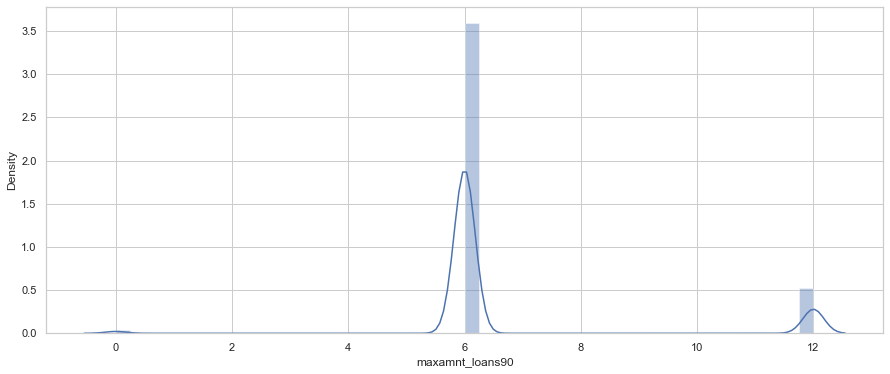

In [1549]:
boxplot(data,"maxamnt_loans90")
histogram(data,"maxamnt_loans90")


In [1550]:
outlier_normally(data,"maxamnt_loans90")

(0.39154068912261764, 13.01472764999176)

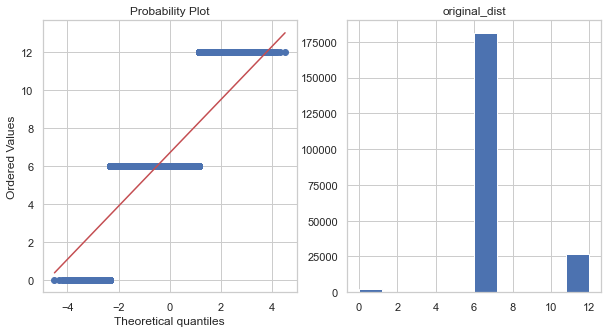

In [1551]:

data.loc[data["maxamnt_loans90"]>13.01472764999176,"maxamnt_loans90"] =13.01472764999176
original_dist(data,"maxamnt_loans90")

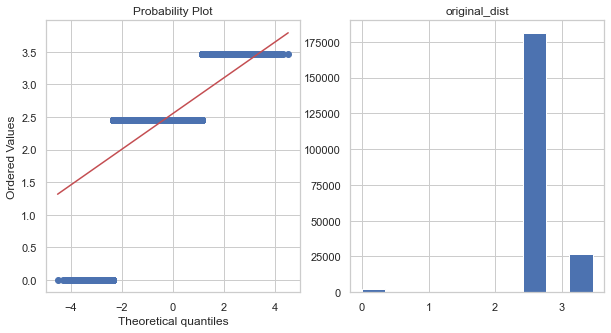

In [1552]:
squareroot_transform(data,"maxamnt_loans90")

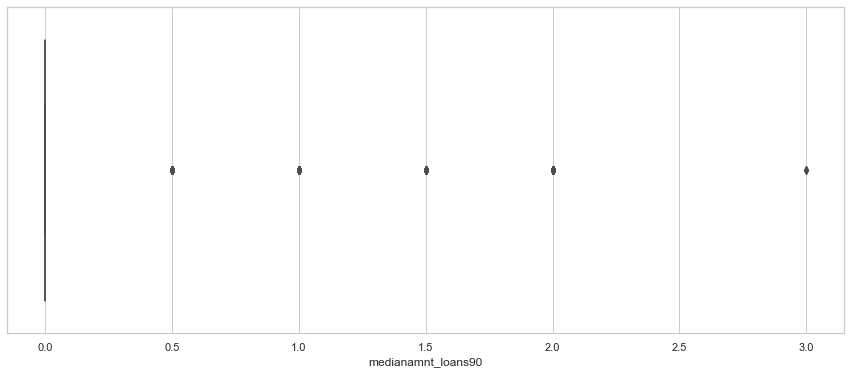

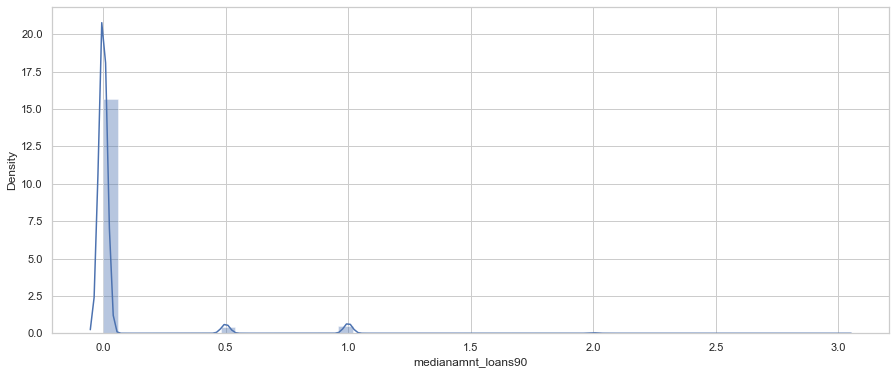

In [1553]:
boxplot(data,"medianamnt_loans90")
histogram(data,"medianamnt_loans90")


In [1555]:
outlier_normally(data,"medianamnt_loans90")

(-0.55599725087428, 0.6481520461203044)

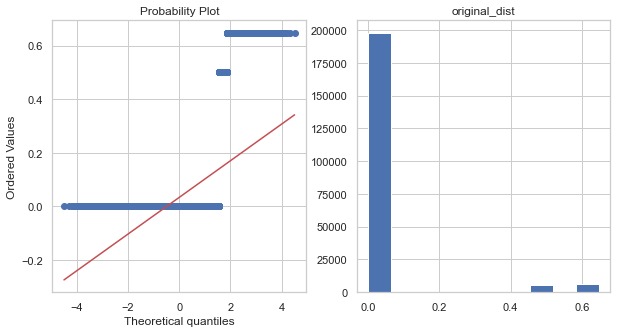

In [1556]:

data.loc[data["medianamnt_loans90"]>0.6481520461203044,"medianamnt_loans90"] =0.6481520461203044
original_dist(data,"medianamnt_loans90")

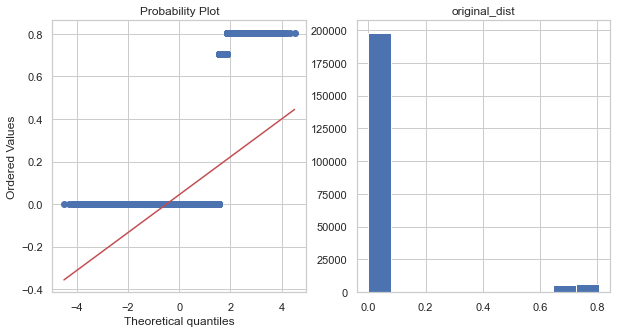

In [1557]:
squareroot_transform(data,"medianamnt_loans90")

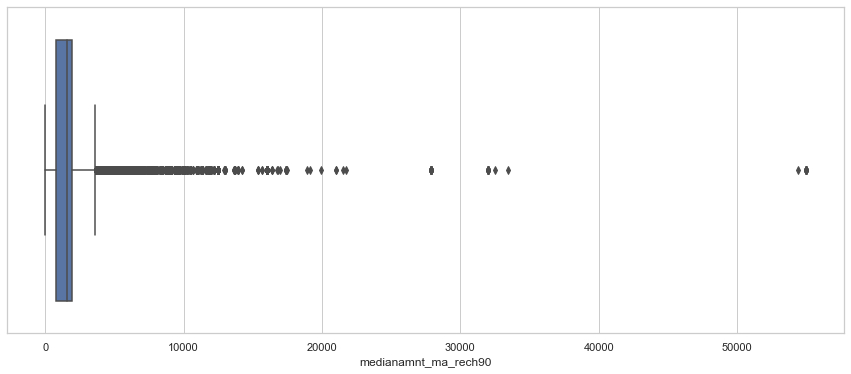

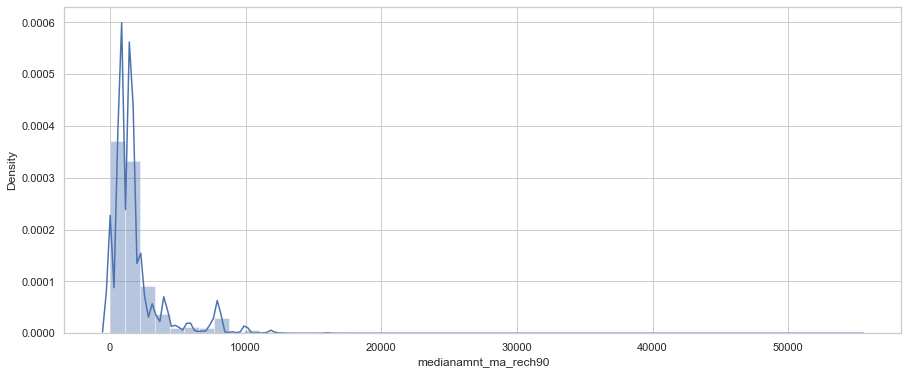

In [1558]:
boxplot(data,"medianamnt_ma_rech90")
histogram(data,"medianamnt_ma_rech90")


In [1559]:
outlier_normally(data,"medianamnt_ma_rech90")

(-4380.446169200478, 8109.637812051146)

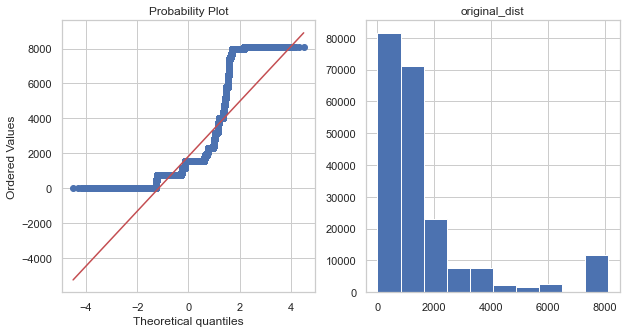

In [1560]:

data.loc[data["medianamnt_ma_rech90"]>8109.637812051146,"medianamnt_ma_rech90"] =8109.637812051146
original_dist(data,"medianamnt_ma_rech90")

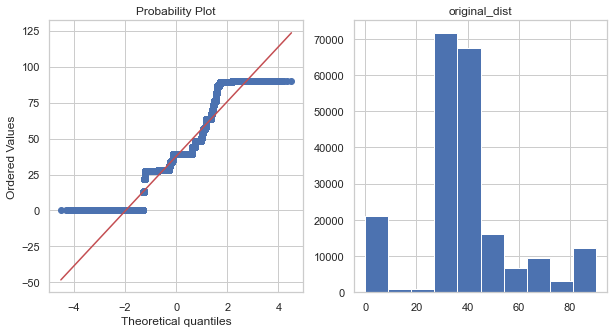

In [1561]:
squareroot_transform(data,"medianamnt_ma_rech90")

In [ ]:
outlier_normally(data,"sumamnt_ma_rech90")

In [ ]:

data.loc[data["sumamnt_ma_rech90"]>62969.599998550475,"sumamnt_ma_rech90"] =62969.599998550475
original_dist(data,"sumamnt_ma_rech90")

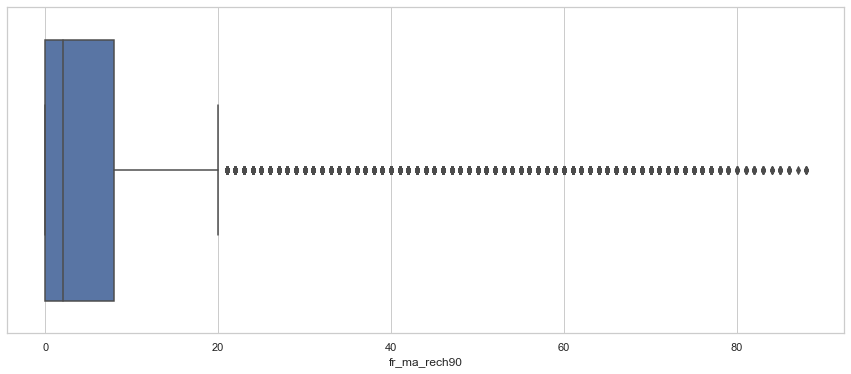

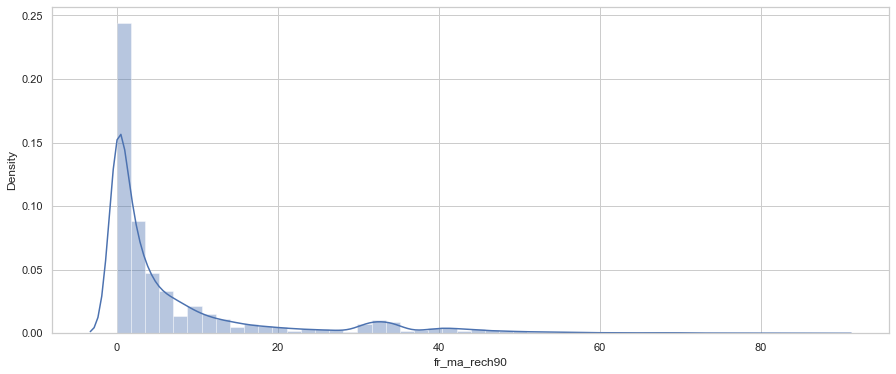

In [1563]:
boxplot(data,"fr_ma_rech90")
histogram(data,"fr_ma_rech90")


In [1564]:
outlier_normally(data,"fr_ma_rech90")

(-30.053974695145598, 45.48753402203151)

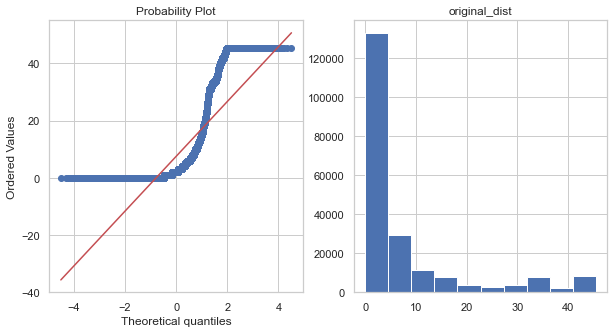

In [1565]:

data.loc[data["fr_ma_rech90"]>45.48753402203151,"fr_ma_rech90"] =45.48753402203151

original_dist(data,"fr_ma_rech90")

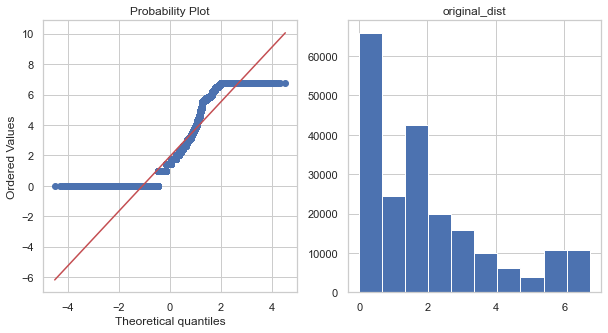

In [1566]:
squareroot_transform(data,"fr_ma_rech90")

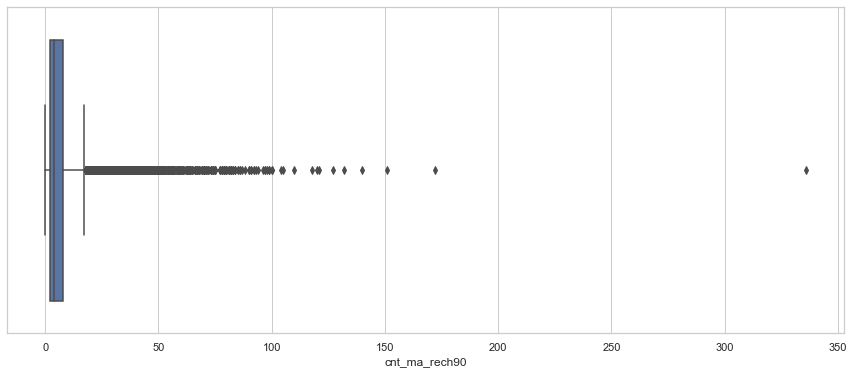

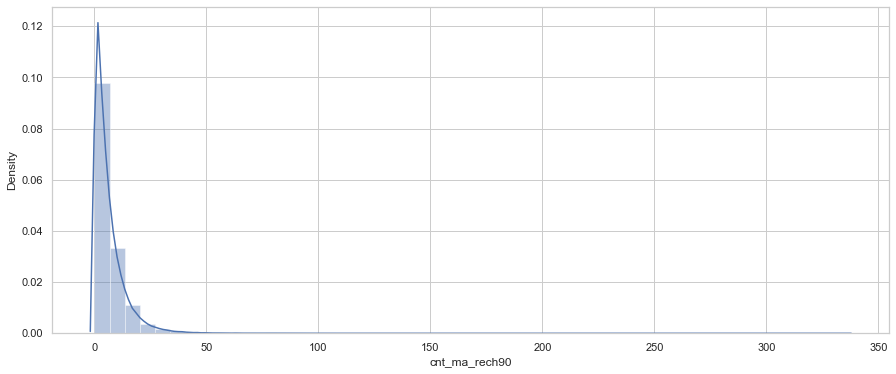

In [1568]:
boxplot(data,"cnt_ma_rech90")
histogram(data,"cnt_ma_rech90")


In [1570]:
outlier_normally(data,"cnt_ma_rech90")

(-15.264980020552077, 27.895840784031773)

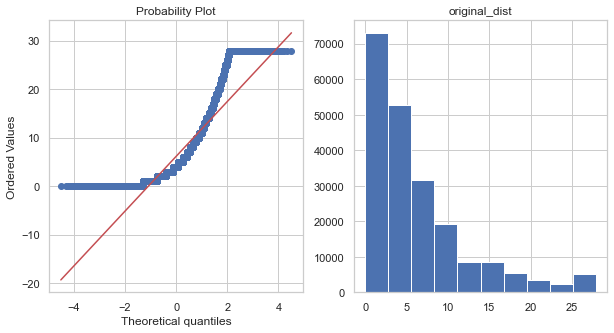

In [1571]:

data.loc[data["cnt_ma_rech90"]>27.895840784031773,"cnt_ma_rech90"] =27.895840784031773
original_dist(data,"cnt_ma_rech90")

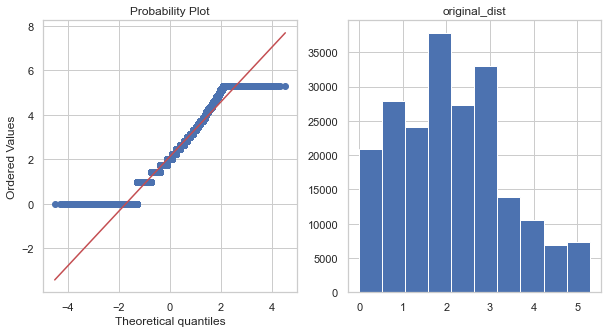

In [1572]:
squareroot_transform(data,"cnt_ma_rech90")

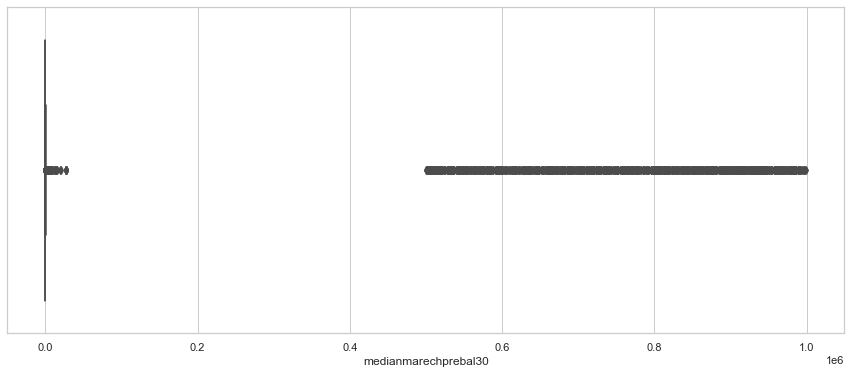

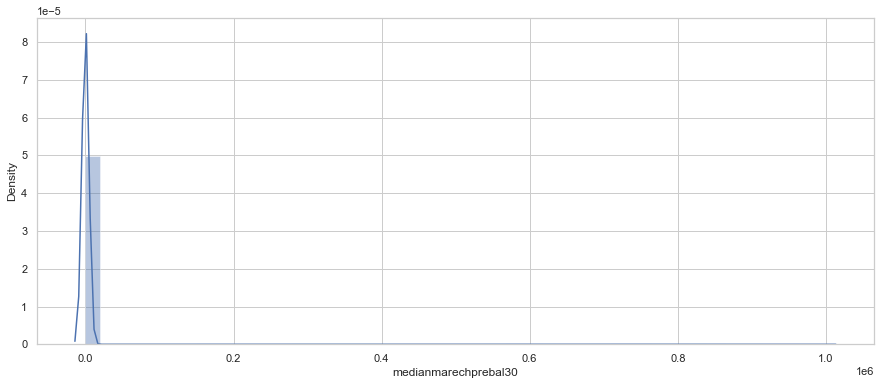

In [1573]:
boxplot(data,"medianmarechprebal30")
histogram(data,"medianmarechprebal30")


In [1574]:
outlier_normally(data,"medianmarechprebal30")


(-158167.19535665237, 165871.05124122958)

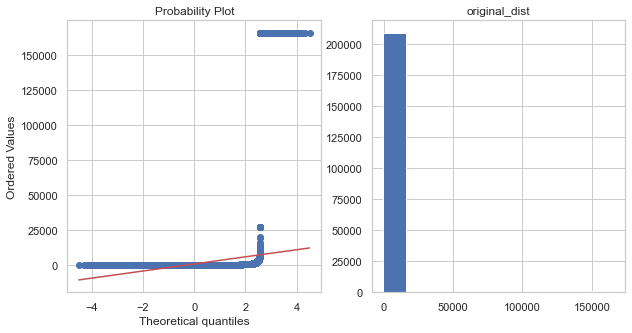

In [1575]:

data.loc[data["medianmarechprebal30"]>165871.05124122958,"medianmarechprebal30"] =165871.05124122958
original_dist(data,"medianmarechprebal30")

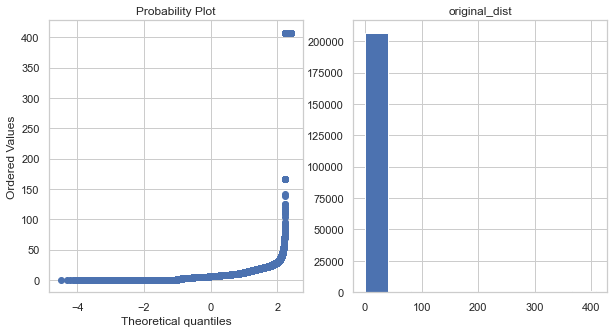

In [1576]:
squareroot_transform(data,"medianmarechprebal30")

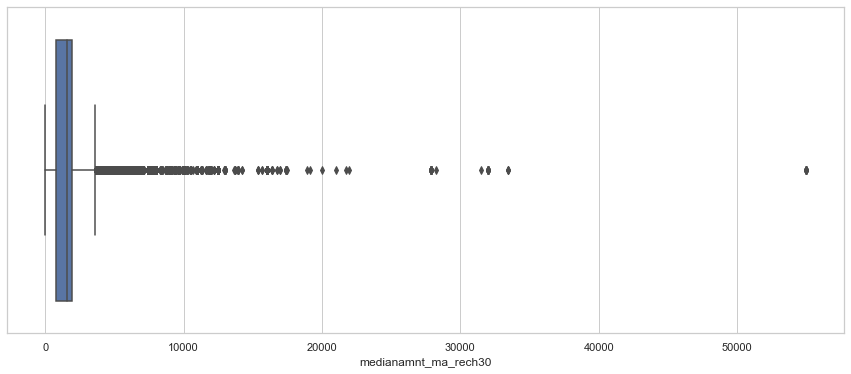

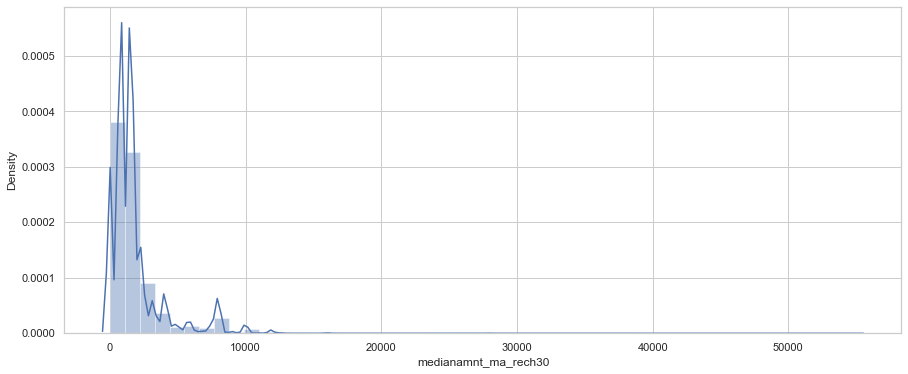

In [1578]:
boxplot(data,"medianamnt_ma_rech30")
histogram(data,"medianamnt_ma_rech30")


In [1579]:
outlier_normally(data,"medianamnt_ma_rech30")

(-4399.77590729811, 8025.411811168946)

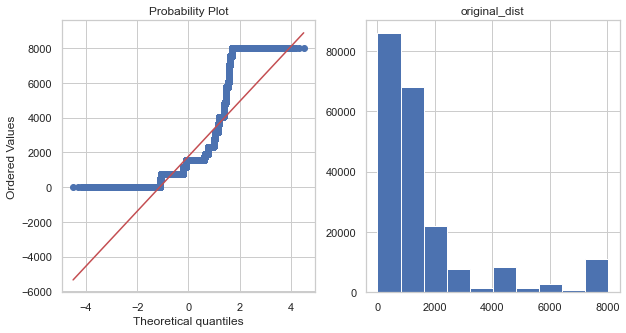

In [1580]:

data.loc[data["medianamnt_ma_rech30"]>8025.411811168946,"medianamnt_ma_rech30"] =8025.411811168946
original_dist(data,"medianamnt_ma_rech30")

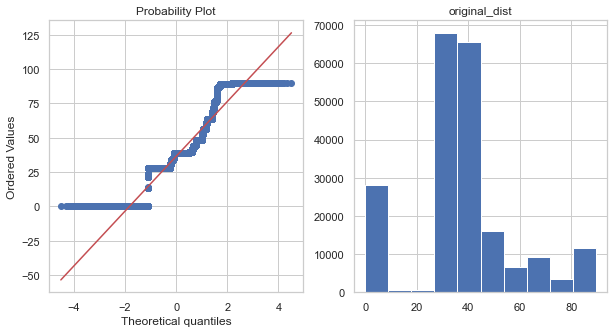

In [1581]:
squareroot_transform(data,"medianamnt_ma_rech30")

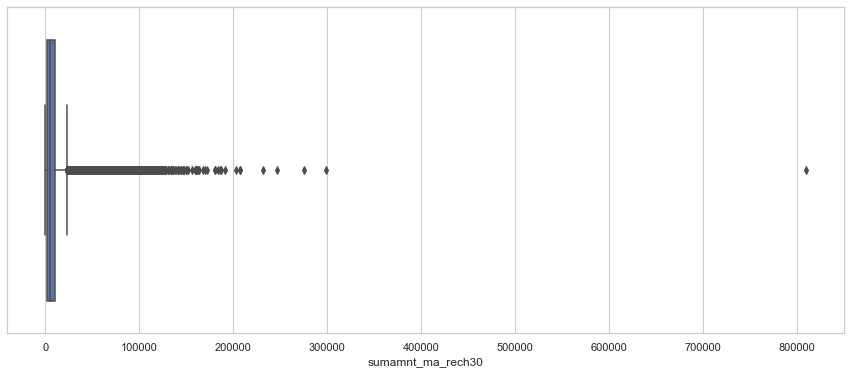

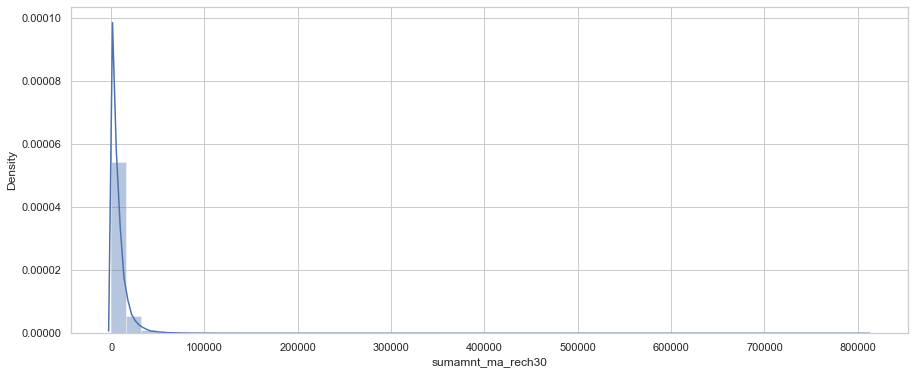

In [1582]:
boxplot(data,"sumamnt_ma_rech30")
histogram(data,"sumamnt_ma_rech30")


In [1583]:
outlier_normally(data,"sumamnt_ma_rech30")

(-22714.36398437553, 38123.366298384106)

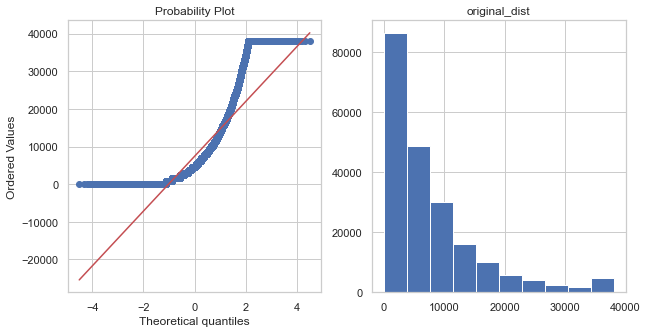

In [1584]:

data.loc[data["sumamnt_ma_rech30"]>38123.366298384106,"sumamnt_ma_rech30"] =38123.366298384106
original_dist(data,"sumamnt_ma_rech30")

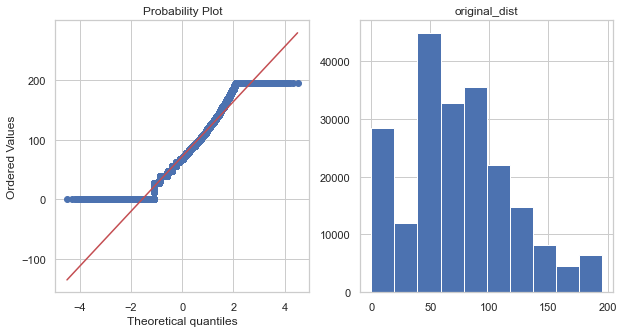

In [1585]:
squareroot_transform(data,"sumamnt_ma_rech30")

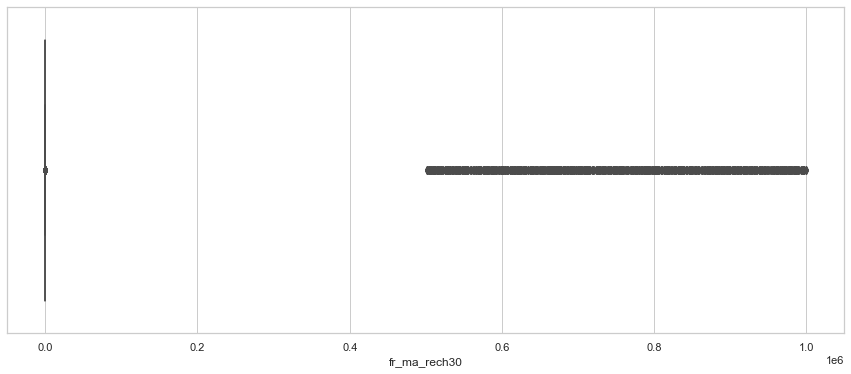

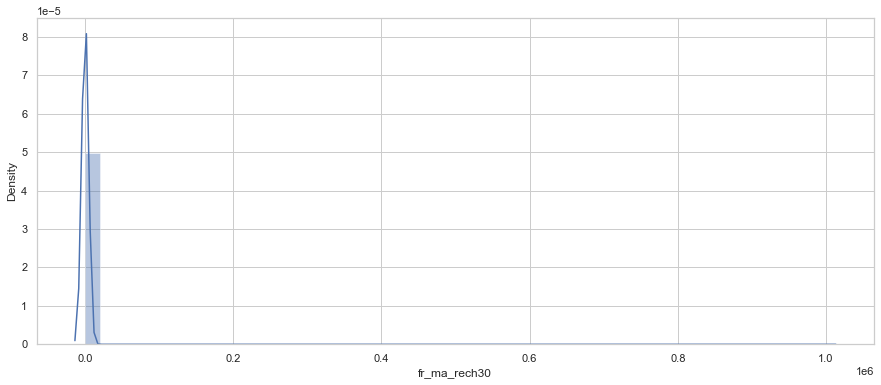

In [1586]:
boxplot(data,"fr_ma_rech30")
histogram(data,"fr_ma_rech30")


In [1587]:
outlier_normally(data,"fr_ma_rech30")

(-157193.52039597213, 164668.2306372914)

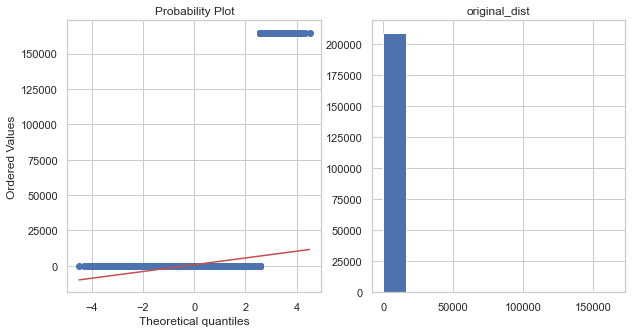

In [1588]:

data.loc[data["fr_ma_rech30"]>164668.2306372914,"fr_ma_rech30"] =164668.2306372914
original_dist(data,"fr_ma_rech30")

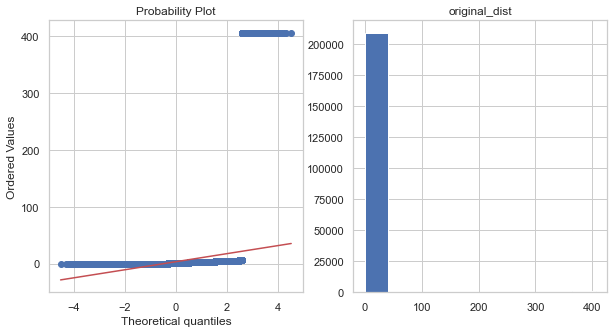

In [1589]:
squareroot_transform(data,"fr_ma_rech30")

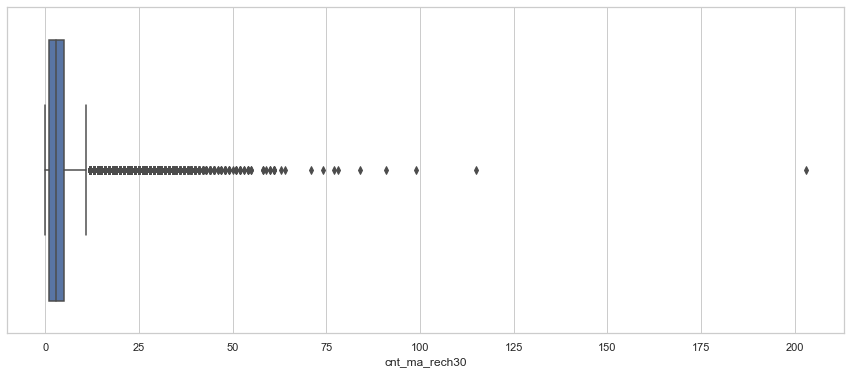

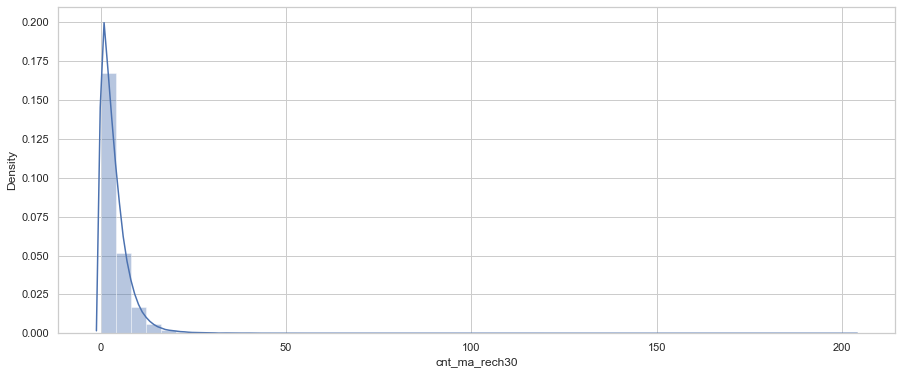

In [1590]:
boxplot(data,"cnt_ma_rech30")
histogram(data,"cnt_ma_rech30")


In [1591]:
outlier_normally(data,"cnt_ma_rech30")

(-8.790211321167051, 16.746326267754007)

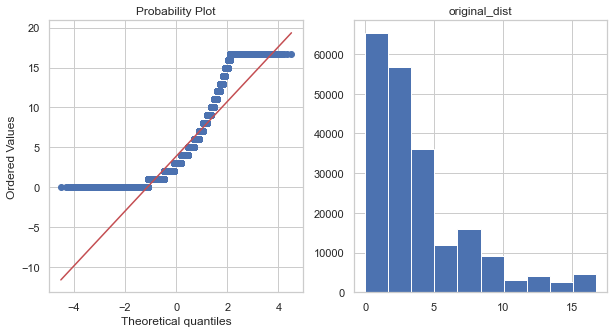

In [1592]:

data.loc[data["cnt_ma_rech30"]>16.746326267754007,"cnt_ma_rech30"] =16.746326267754007
original_dist(data,"cnt_ma_rech30")

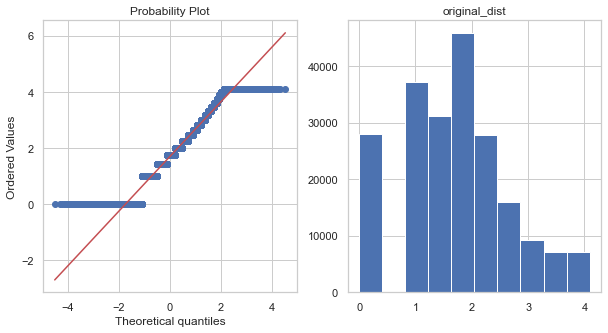

In [1593]:
squareroot_transform(data,"cnt_ma_rech30")

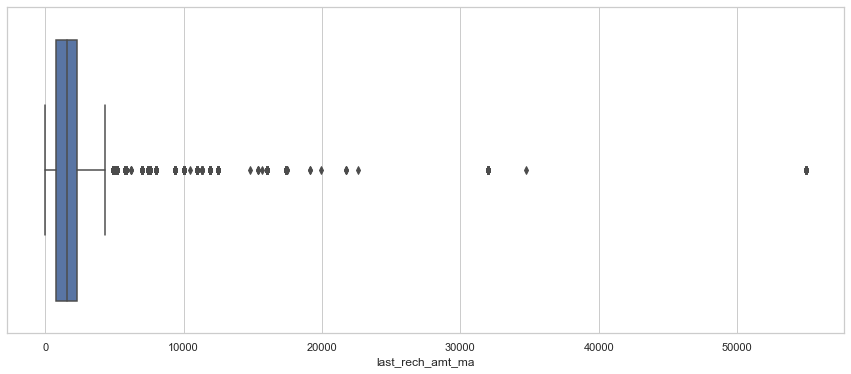

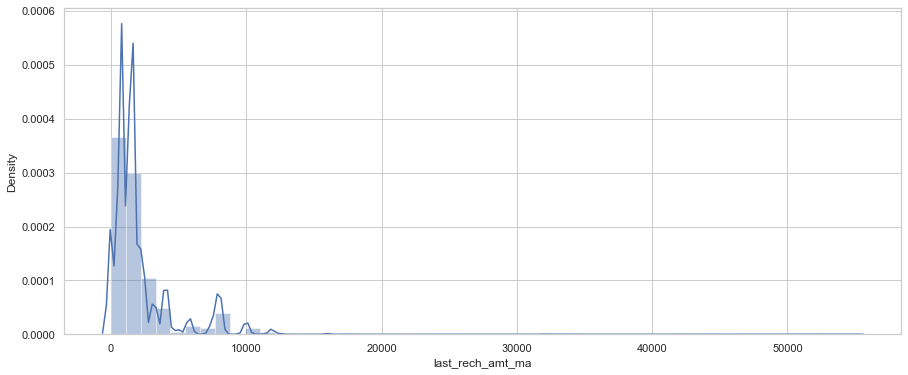

In [1594]:
boxplot(data,"last_rech_amt_ma")
histogram(data,"last_rech_amt_ma")


In [1595]:
outlier_normally(data,"last_rech_amt_ma")

(-5047.905304347056, 9176.810897568204)

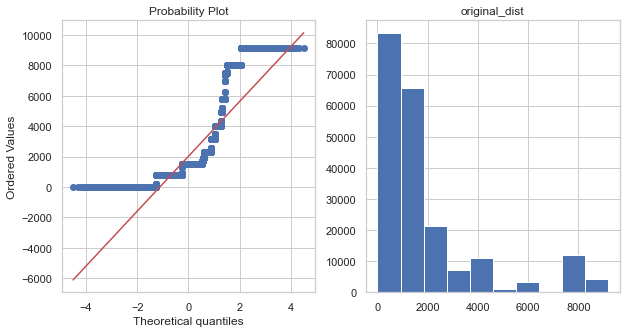

In [1596]:

data.loc[data["last_rech_amt_ma"]>9176.810897568204,"last_rech_amt_ma"] =9176.810897568204
original_dist(data,"last_rech_amt_ma")

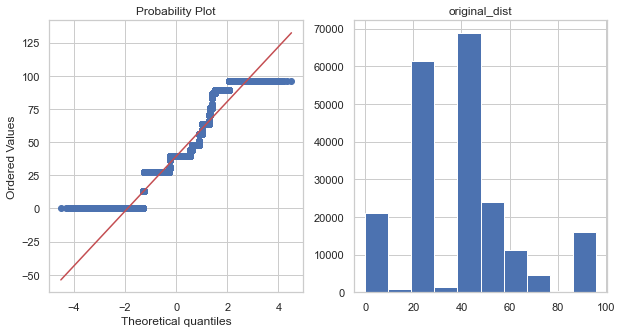

In [1597]:
squareroot_transform(data,"last_rech_amt_ma")

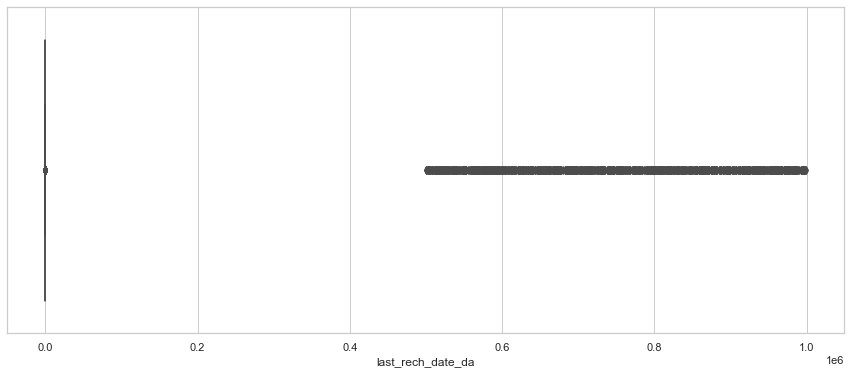

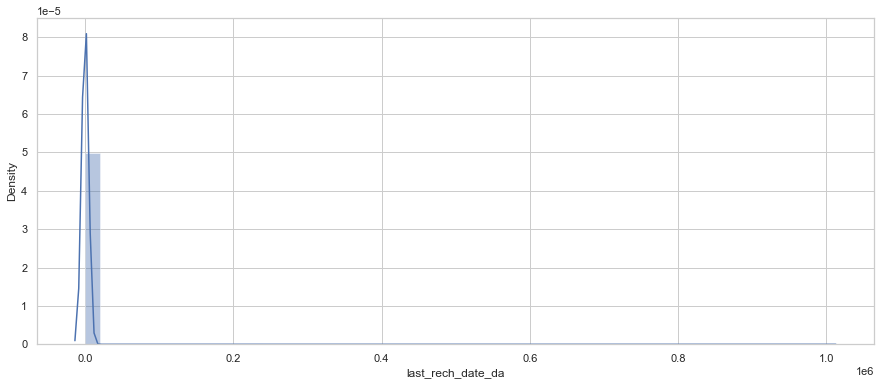

In [1598]:
boxplot(data,"last_rech_date_da")
histogram(data,"last_rech_date_da")


In [1599]:
outlier_normally(data,"last_rech_date_da")


(-156412.29736826223, 163836.70320962163)

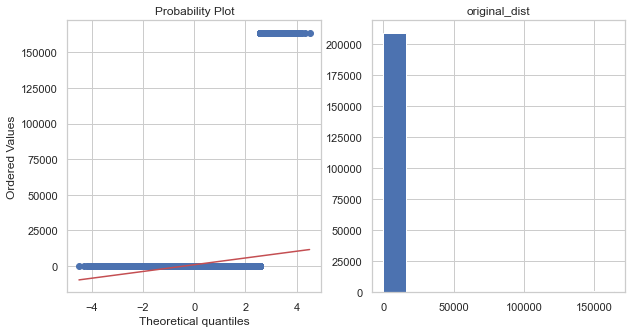

In [1600]:

data.loc[data["last_rech_date_da"]>163836.70320962163,"last_rech_date_da"] =163836.70320962163
original_dist(data,"last_rech_date_da")

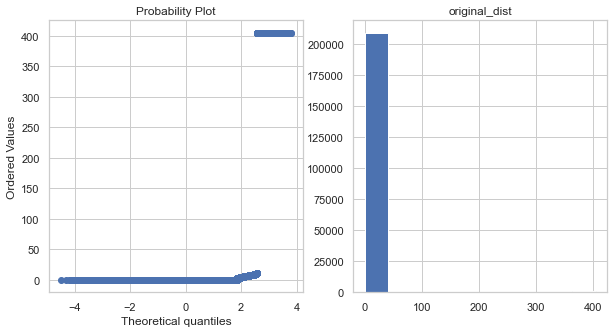

In [1601]:
squareroot_transform(data,"last_rech_date_da")

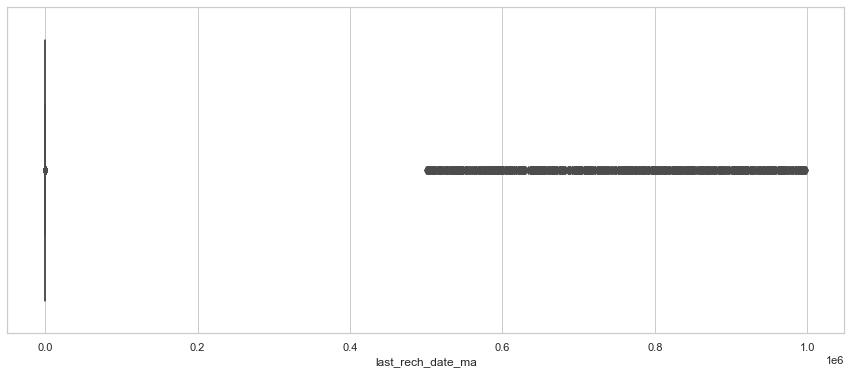

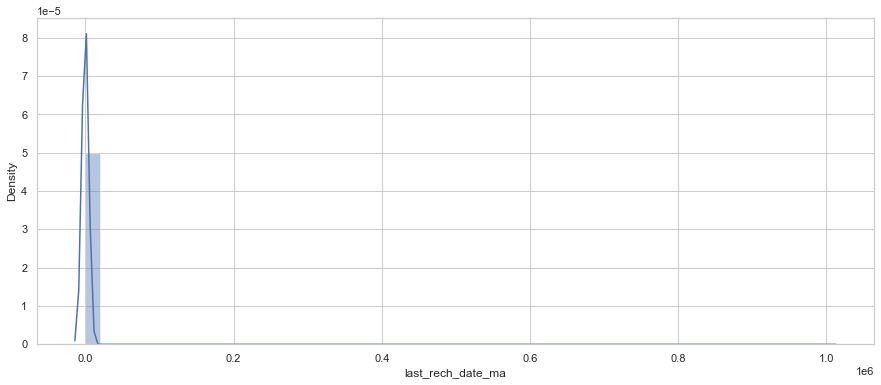

In [1602]:
boxplot(data,"last_rech_date_ma")
histogram(data,"last_rech_date_ma")


In [1603]:
outlier_normally(data,"last_rech_date_ma")

(-157961.8288899408, 165473.52449006145)

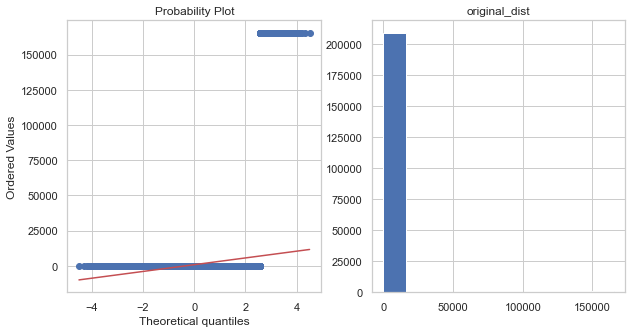

In [1604]:

data.loc[data["last_rech_date_ma"]>165473.52449006145,"last_rech_date_ma"] =165473.52449006145
original_dist(data,"last_rech_date_ma")

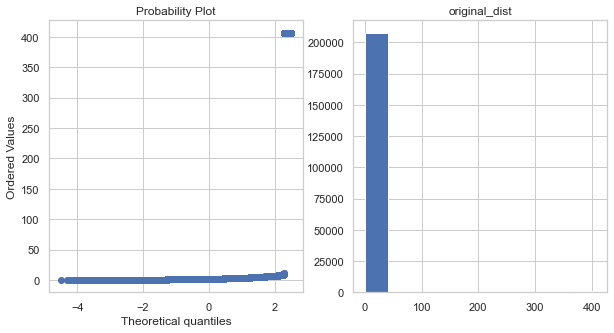

In [1605]:
squareroot_transform(data,"last_rech_date_ma")

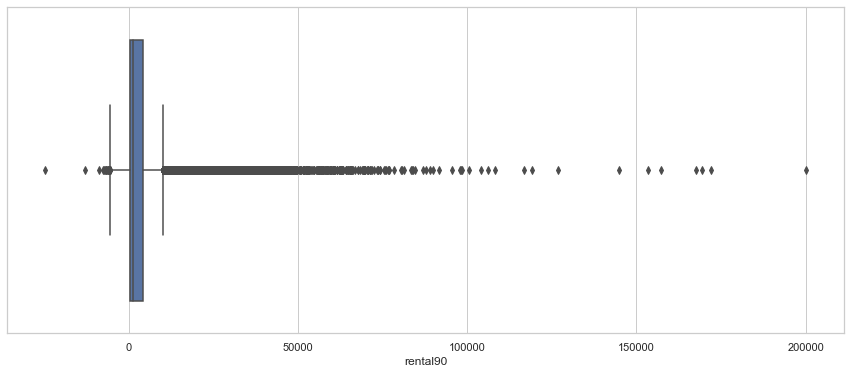

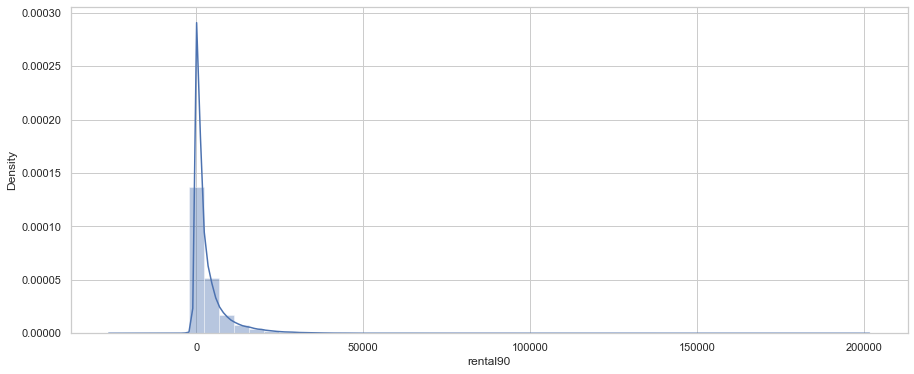

In [1607]:
boxplot(data,"rental90")
histogram(data,"rental90")


In [1608]:
outlier_normally(data,"rental90")

(-13827.97730195992, 20794.790370430394)

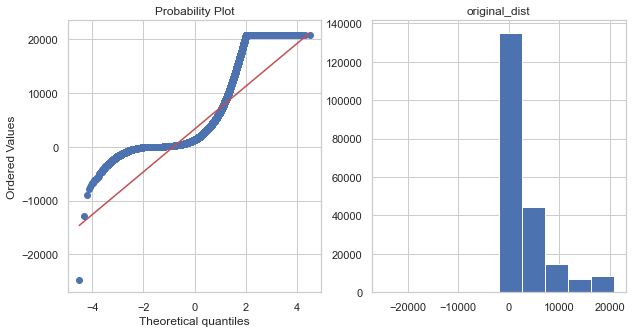

In [1609]:

data.loc[data["rental90"]>20794.790370430394,"rental90"] =20794.790370430394
original_dist(data,"rental90")

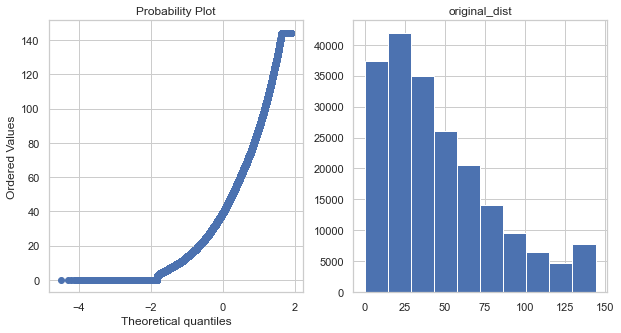

In [1610]:
squareroot_transform(data,"rental90")

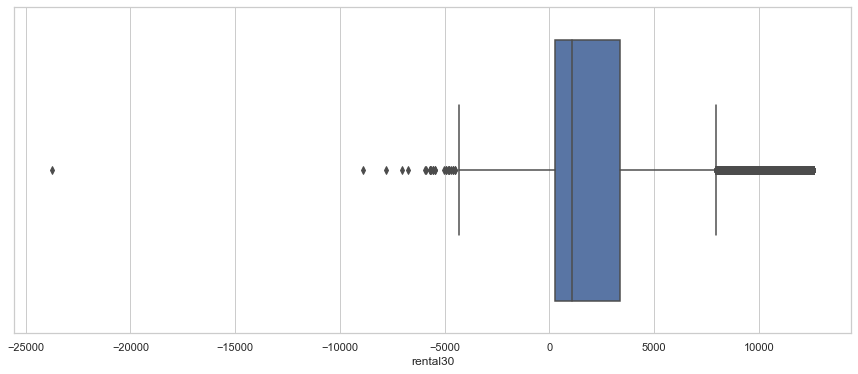

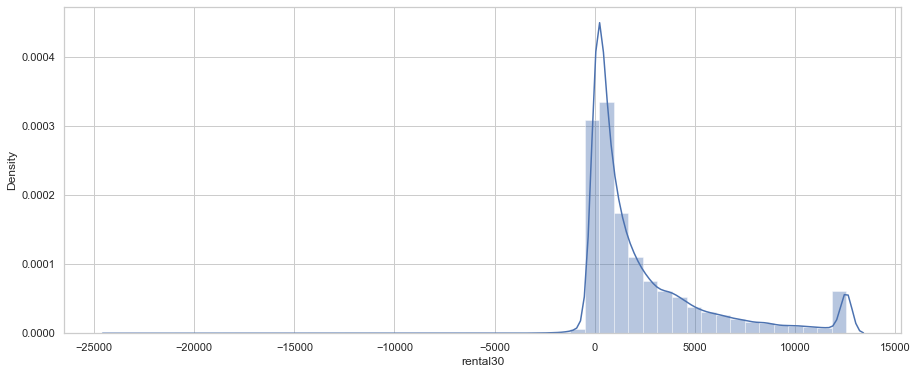

In [1611]:
boxplot(data,"rental30")
histogram(data,"rental30")


In [1612]:
outlier_normally(data,"rental30")

(-7363.685133438591, 12311.624573782232)

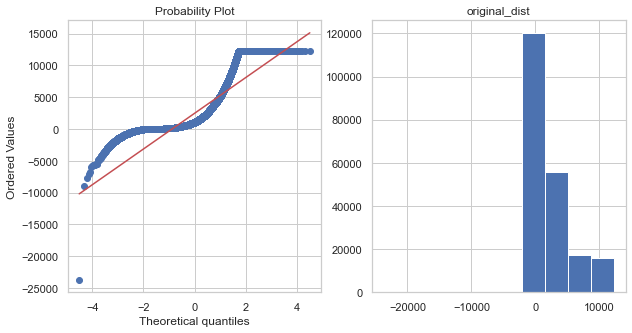

In [1613]:

data.loc[data["rental30"]>12311.624573782232,"rental30"] =12311.624573782232
original_dist(data,"rental30")

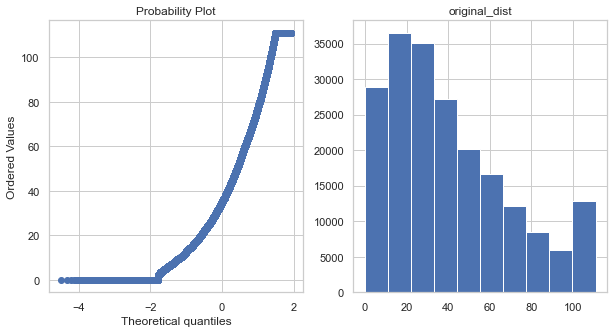

In [1614]:
squareroot_transform(data,"rental30")

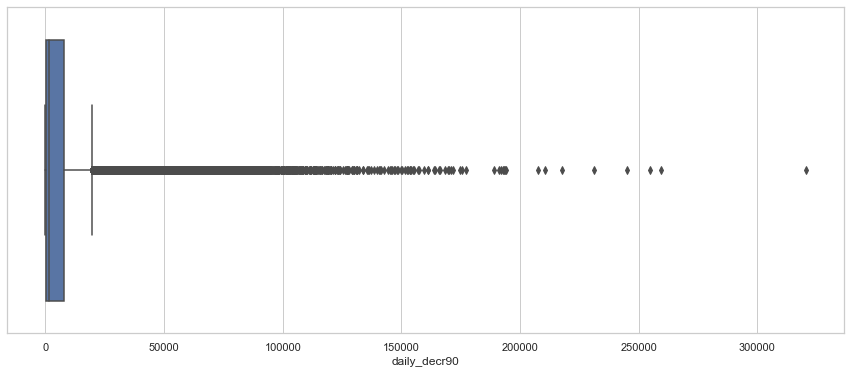

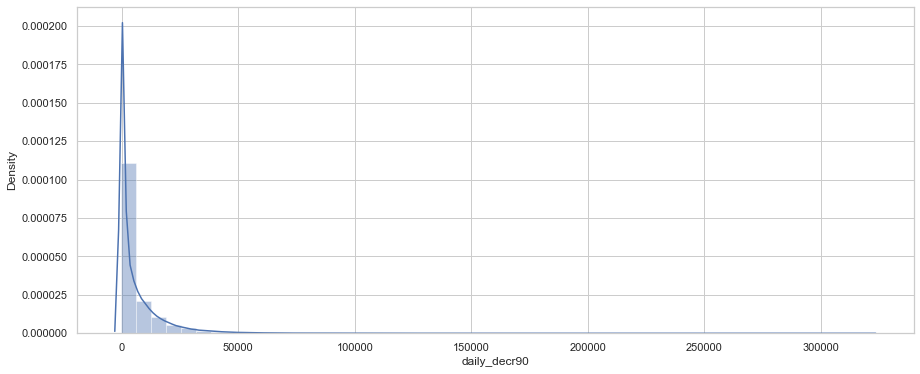

In [1615]:
boxplot(data,"daily_decr90")
histogram(data,"daily_decr90")


In [1616]:
outlier_normally(data,"daily_decr90")

(-26673.923233630852, 38838.95336912872)

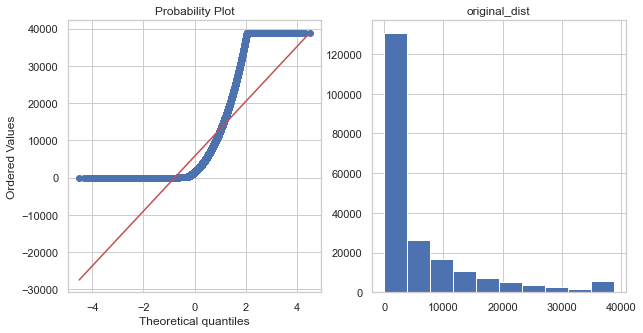

In [1617]:

data.loc[data["daily_decr90"]>38838.95336912872,"daily_decr90"] =38838.95336912872
original_dist(data,"daily_decr90")

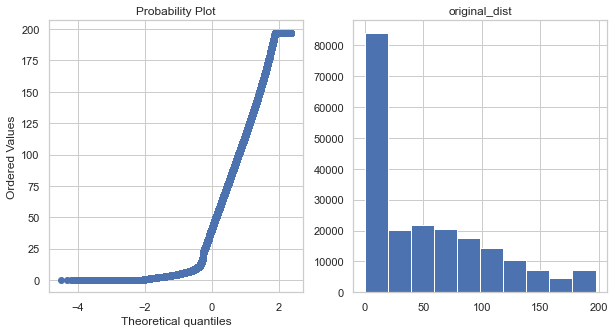

In [1618]:
squareroot_transform(data,"daily_decr90")

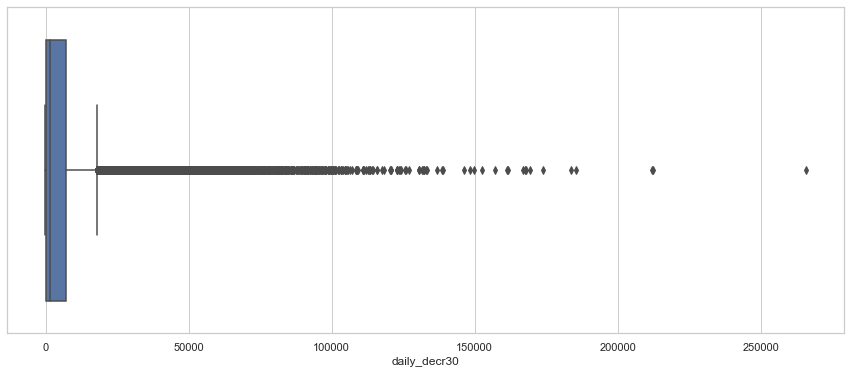

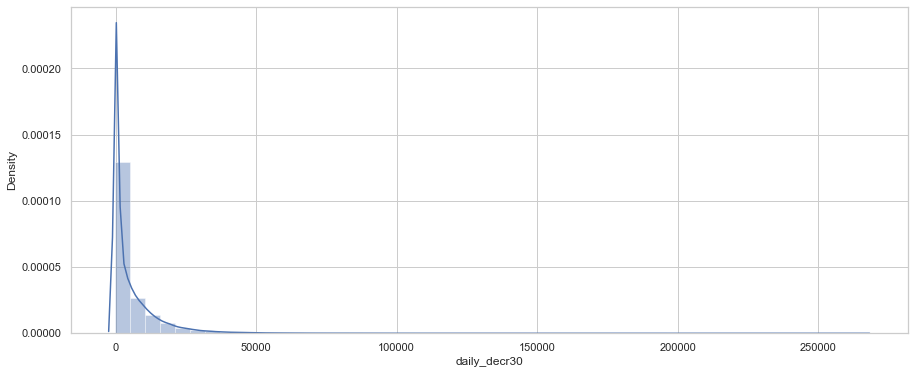

In [1619]:
boxplot(data,"daily_decr30")
histogram(data,"daily_decr30")


In [1620]:
outlier_normally(data,"daily_decr30")

(-22280.467910833853, 33043.27248866154)

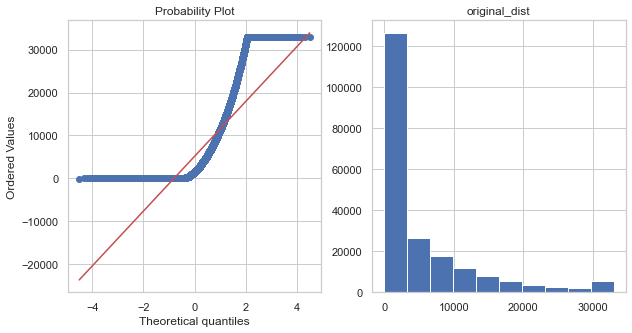

In [1621]:

data.loc[data["daily_decr30"]>33043.27248866154,"daily_decr30"] =33043.27248866154
original_dist(data,"daily_decr30")

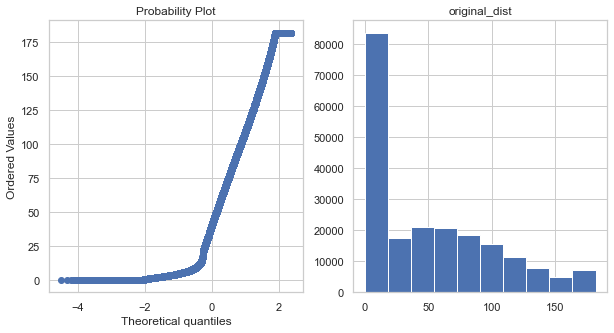

In [1622]:
squareroot_transform(data,"daily_decr30")

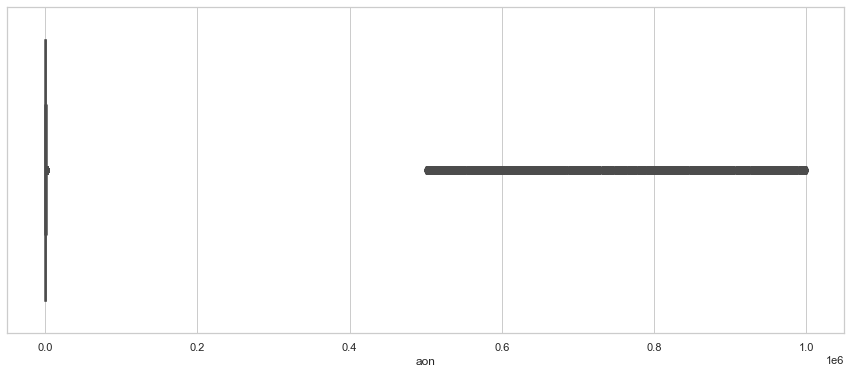

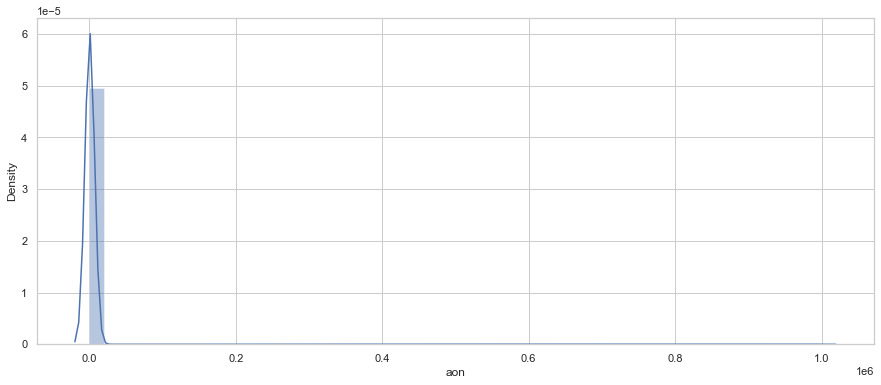

In [1623]:
boxplot(data,"aon")
histogram(data,"aon")


In [1624]:
outlier_IQR(data,"aon")

(-858.0, 2086.0)

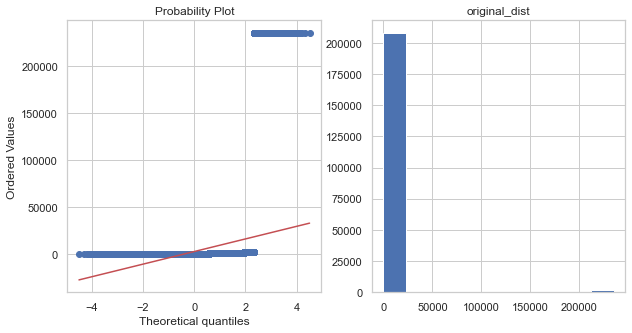

In [1625]:

data.loc[data["aon"]>235200.5910369971,"aon"] =235200.5910369971
original_dist(data,"aon")

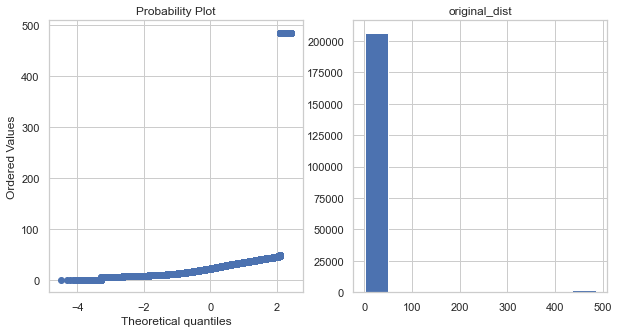

In [1626]:
squareroot_transform(data,"aon")

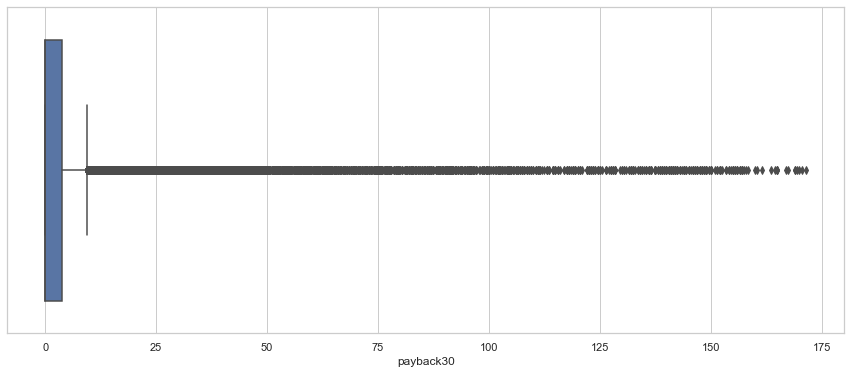

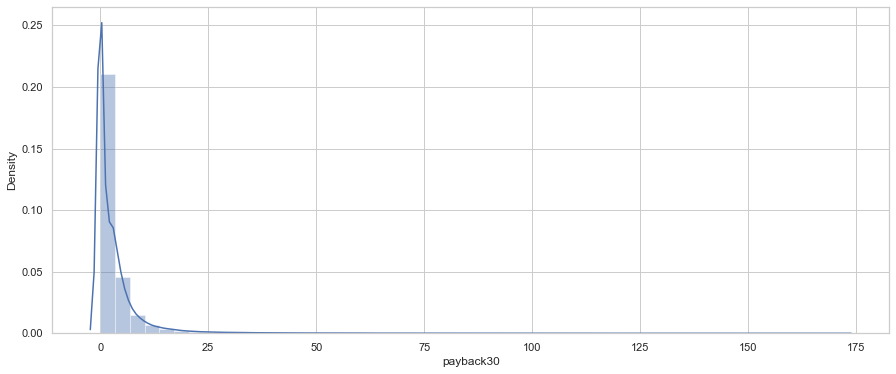

In [1627]:
boxplot(data,"payback30")
histogram(data,"payback30")


In [1628]:
outlier_normally(data,"payback30")

(-23.042359154589114, 29.840012035305364)

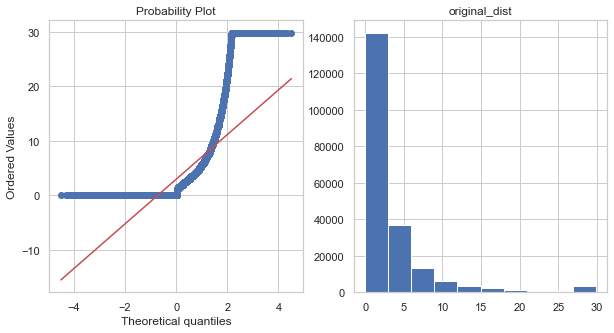

In [1629]:

data.loc[data["payback30"]>29.840012035305364,"payback30"] =29.840012035305364
original_dist(data,"payback30")

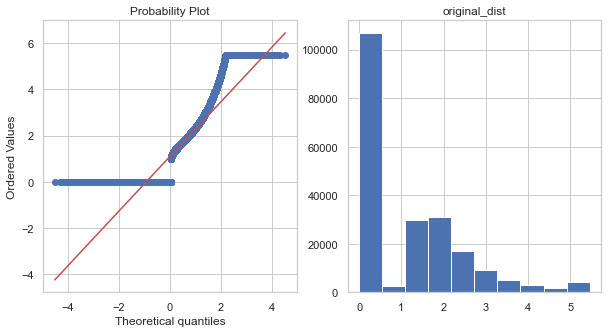

In [1630]:
squareroot_transform(data,"payback30")

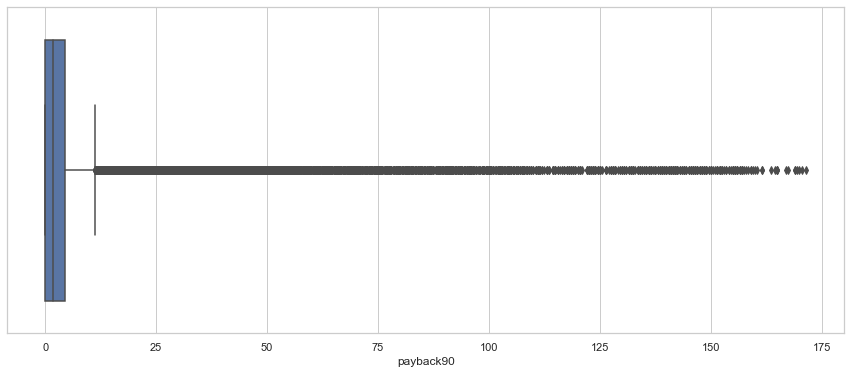

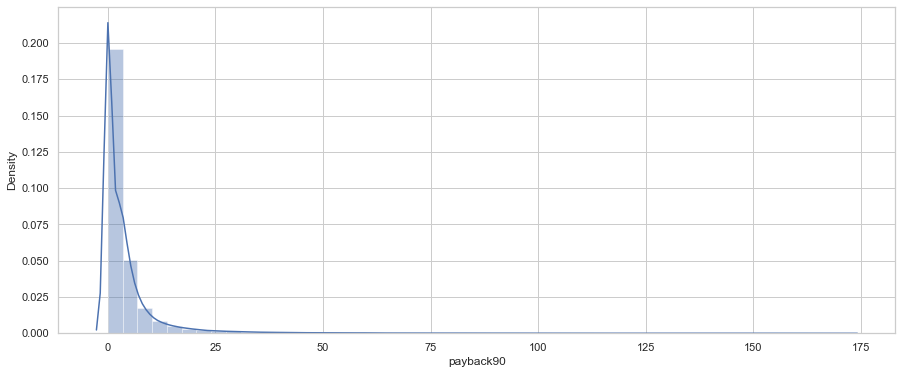

In [1631]:
boxplot(data,"payback90")
histogram(data,"payback90")


In [1632]:
outlier_normally(data,"payback90")

(-26.602838426662426, 35.24580887812989)

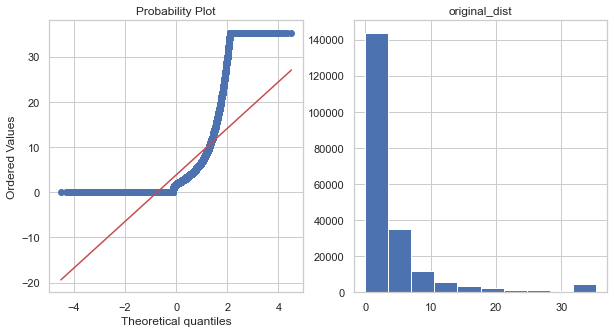

In [1633]:

data.loc[data["payback90"]>35.24580887812989,"payback90"] =35.24580887812989
original_dist(data,"payback90")

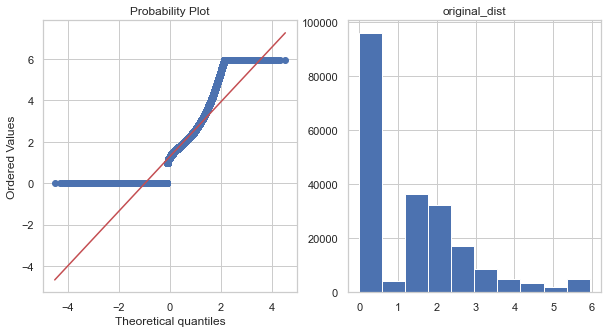

In [1634]:
squareroot_transform(data,"payback90")

In [1635]:
data["Year"] = data['pdate'].str.split('-').str[0].astype(int)
data["Month"] = data['pdate'].str.split('-').str[1].astype(int)
data["Day"] = data['pdate'].str.split('-').str[2].astype(int)

In [1636]:
kk=['pdate','pcircle','msisdn','Unnamed: 0']

In [1637]:
data.drop(kk,axis='columns', inplace=True)

In [1638]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  float64
 9   cnt_ma_rech30         209593 non-null  float64
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  float64
 15  

In [1639]:
# class count
class_count_0, class_count_1 = data['label'].value_counts()

# Separate class
class_0 = data[data['label'] == 1]
class_1 = data[data['label'] == 0]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (183431, 36)
class 1: (26162, 36)


total label of 1 and 0: 1    183431
0    183431
Name: label, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

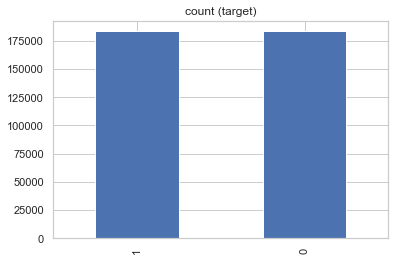

In [1640]:

class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total label of 1 and 0:",test_over['label'].value_counts())# plot the count after under-sampeling
test_over['label'].value_counts().plot(kind='bar', title='count (target)')

In [1641]:
test_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366862 entries, 143695 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 366862 non-null  int64  
 1   aon                   366862 non-null  float64
 2   daily_decr30          366862 non-null  float64
 3   daily_decr90          366862 non-null  float64
 4   rental30              366862 non-null  float64
 5   rental90              366862 non-null  float64
 6   last_rech_date_ma     366862 non-null  float64
 7   last_rech_date_da     366862 non-null  float64
 8   last_rech_amt_ma      366862 non-null  float64
 9   cnt_ma_rech30         366862 non-null  float64
 10  fr_ma_rech30          366862 non-null  float64
 11  sumamnt_ma_rech30     366862 non-null  float64
 12  medianamnt_ma_rech30  366862 non-null  float64
 13  medianmarechprebal30  366862 non-null  float64
 14  cnt_ma_rech90         366862 non-null  float64


In [1642]:
from sklearn.preprocessing import StandardScaler 

#data= StandardScaler().fit_transform(test_over)
data= pd.DataFrame(StandardScaler().fit_transform(test_over), columns=test_over.columns, index=test_over.index)

In [1643]:
x = data.drop(['label'],axis = 1)
y = data['label'] 

In [1644]:
from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.3,random_state=23)

In [1645]:
from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_valid = pca.transform(x_valid)

In [1646]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix,classification_report
import pickle

In [1647]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
rf_model.score(x_train,y_train)

0.999976635786965

In [1648]:
rf_prediction = rf_model.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,rf_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,rf_prediction))

Accuracy_Score:  0.9663362378360697
roc_auc_score:  0.9662067444755146


In [1649]:
param = {"n_estimators":[50,100,200,250,300],"max_depth":[3,4,5,7,8,9,10,12],"min_samples_split":[2,3,4,5,6,7,8],
        "min_samples_leaf":[1,2,3,4,5,6,7],"max_features":["auto","log2"],"criterion":["gini","entropy"]}

rf_rdm_cv = RandomizedSearchCV(rf_model,param_distributions=param,cv=4,n_jobs=-1,verbose=12)
rf_rdm_cv.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  13 out of  40 | elapsed:  3.6min remaining:  7.5min
[Parallel(n_jobs=-1)]: Done  17 out of  40 | elapsed:  3.8min remaining:  5.1min
[Parallel(n_jobs=-1)]: Done  21 out of  40 | elapsed:  4.3min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  25 out of  40 | elapsed:  4.7min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  29 out of  4

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 7, 8, 9, 10, 12],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'n_estimators': [50, 100, 200, 250,
                                                         300]},
                   verbose=12)

In [1650]:
print("Best_parameters:",rf_rdm_cv.best_params_)
print("Best_Score:",rf_rdm_cv.best_score_)

Best_parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 12, 'criterion': 'gini'}
Best_Score: 0.8470539792739129


In [1651]:
# save random forest model.

pickle_rf_file = open("rf_rdm_cv.pickle","wb")
pickle.dump(rf_rdm_cv,pickle_rf_file)
pickle_rf_file.close()

In [1652]:
# Prediction on validation data.

rf_rdm_prediction = rf_rdm_cv.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,rf_rdm_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,rf_rdm_prediction))

Accuracy_Score:  0.8517340699079584
roc_auc_score:  0.8516451928321143


In [1653]:
rf_proba = rf_rdm_cv.predict_proba(x_valid)[:,1]

Text(30.5, 0.5, 'Actual Values')

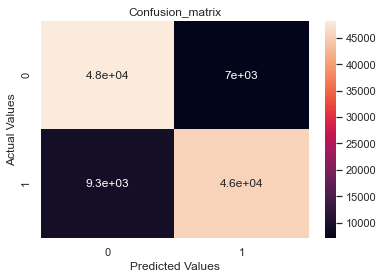

In [1654]:
# Make Confusion matrix

sns.heatmap(confusion_matrix(y_valid,rf_rdm_prediction),annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [1655]:
# print classification report
print(classification_report(y_valid,rf_rdm_prediction))

              precision    recall  f1-score   support

        -1.0       0.84      0.87      0.86     55263
         1.0       0.87      0.83      0.85     54796

    accuracy                           0.85    110059
   macro avg       0.85      0.85      0.85    110059
weighted avg       0.85      0.85      0.85    110059



Apply GardientBoosting Classifier

In [1656]:
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train,y_train)
gb_model.score(x_train,y_train)

0.798978205083274

In [1657]:
# Prediction on validation data.

gb_prediction = gb_model.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,gb_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,gb_prediction))

Accuracy_Score:  0.7997892039724148
roc_auc_score:  0.7997975124985397


In [1658]:
# Let's do hyperparameter tuning by Randomized Search CV on GradientBoosting Classifier

param={"n_estimators":[50,100,200,250,300],"learning_rate":[0.01,0.1,0.3,0.5,0.7],
       "min_samples_split":[2,4,5,7],"max_depth":[3,5,7,9,12]}

gb_rdm_cv = RandomizedSearchCV(gb_model,param_distributions=param,cv=4,n_jobs=-1,verbose=5)
gb_rdm_cv.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed: 35.0min remaining: 42.8min
[Parallel(n_jobs=-1)]: Done  27 out of  40 | elapsed: 55.6min remaining: 26.7min
[Parallel(n_jobs=-1)]: Done  36 out of  40 | elapsed: 71.3min remaining:  7.9min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 78.7min finished


RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3, 0.5,
                                                          0.7],
                                        'max_depth': [3, 5, 7, 9, 12],
                                        'min_samples_split': [2, 4, 5, 7],
                                        'n_estimators': [50, 100, 200, 250,
                                                         300]},
                   verbose=5)

In [1659]:
print("Best_parameters:",gb_rdm_cv.best_params_)


print("Best_Score:",gb_rdm_cv.best_score_)

Best_parameters: {'n_estimators': 50, 'min_samples_split': 7, 'max_depth': 12, 'learning_rate': 0.7}
Best_Score: 0.9291168816165896


In [1660]:
# Save GB Model
pickle_gb_file = open("gb_rdm_cv.pickle","wb")
pickle.dump(gb_rdm_cv,pickle_gb_file)
pickle_gb_file.close()

In [1661]:
# Prediction on validation data.

gb_rdm_prediction = gb_rdm_cv.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,gb_rdm_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,gb_rdm_prediction))

Accuracy_Score:  0.9402047992440419
roc_auc_score:  0.9399974182212741


In [1662]:
gb_proba = gb_rdm_cv.predict_proba(x_valid)[:,1]

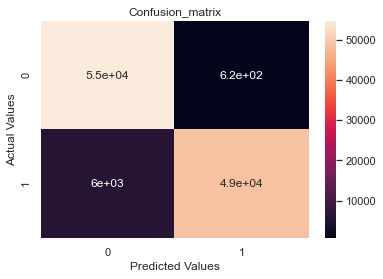

In [1663]:
# Make Confusion matrix

sns.heatmap(confusion_matrix(y_valid,gb_rdm_prediction),annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [1664]:
# print classification report
print(classification_report(y_valid,gb_rdm_prediction))

              precision    recall  f1-score   support

        -1.0       0.90      0.99      0.94     55263
         1.0       0.99      0.89      0.94     54796

    accuracy                           0.94    110059
   macro avg       0.94      0.94      0.94    110059
weighted avg       0.94      0.94      0.94    110059



Apply XGB Classifier

In [1665]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)
xgb_model.score(x_train,y_train)

[22:47:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8595616094827553

In [1666]:
# Prediction on validation data.

xgb_prediction = xgb_model.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,xgb_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,xgb_prediction))

Accuracy_Score:  0.8483994948164166
roc_auc_score:  0.8482806780676397


In [1667]:
param = {"n_estimators":[50,100,200,300],"learning_rate":[0.001,0.1,0.5,0.7],"gamma":[0.01,0.1,1,10,100],
         "reg_lambda":[1,10,100,500,1000],"max_depth":[3,5,8,12,15]}

xgb_rdm_cv = RandomizedSearchCV(xgb_model,param_distributions=param,cv=5,n_jobs=-1,verbose=5)
xgb_rdm_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  50 | elapsed:  6.6min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 18.8min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 22.2min finished


[23:09:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=16,
                                           num_parallel_tree=1, random_state=0,
                                           reg_alpha=0, reg_lambda=1,
                                      

In [1668]:
print("Best_parameters:",xgb_rdm_cv.best_params_)


print("Best_Score:",xgb_rdm_cv.best_score_)

Best_parameters: {'reg_lambda': 1, 'n_estimators': 200, 'max_depth': 15, 'learning_rate': 0.7, 'gamma': 0.1}
Best_Score: 0.9533533493994406


In [1669]:
# Save Model
xgb_pickle_file = open("xgb_rdm_cv.pickle","wb")
pickle.dump(xgb_rdm_cv,xgb_pickle_file)
xgb_pickle_file.close()

In [1670]:
# Prediction on validation data.

xgb_rdm_prediction = xgb_rdm_cv.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,xgb_rdm_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,xgb_rdm_prediction))

Accuracy_Score:  0.9627018235673593
roc_auc_score:  0.962557228566522


In [1671]:
xgb_proba = xgb_rdm_cv.predict_proba(x_valid)[:,1]

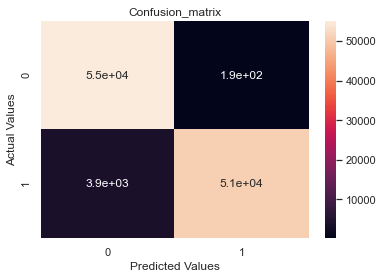

In [1672]:
# Make Confusion matrix

sns.heatmap(confusion_matrix(y_valid,xgb_rdm_prediction),annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [1673]:
# print classification report
print(classification_report(y_valid,xgb_rdm_prediction))

              precision    recall  f1-score   support

        -1.0       0.93      1.00      0.96     55263
         1.0       1.00      0.93      0.96     54796

    accuracy                           0.96    110059
   macro avg       0.96      0.96      0.96    110059
weighted avg       0.96      0.96      0.96    110059



Apply DecisionTree Classifier

In [1674]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_model.score(x_train,y_train)

0.9999805298224709

In [1675]:
# Prediction on validation data.

dt_prediction = dt_model.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,dt_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,dt_prediction))

Accuracy_Score:  0.9467830890704076
roc_auc_score:  0.9465699662252651


In [1676]:
# Let's do hyperparameter tuning by Randomized Search CV on DecisionTree Classifier

param = {"max_depth":[3,4,5,7,8,9,10,12],"min_samples_split":[2,3,4,5,6,7,8],
        "min_samples_leaf":[1,2,3,4,5,6,7],"max_features":["auto","log2","sqrt"],"criterion":["gini","entropy"]}

dt_rdm_cv = RandomizedSearchCV(dt_model,param_distributions=param,n_iter=12,cv=5,n_jobs=-1,verbose=12)
dt_rdm_cv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=12,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 7, 8, 9, 10, 12],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8]},
                   verbose=12)

In [1677]:
print("Best_parameters:",dt_rdm_cv.best_params_)


print("Best_Score:",dt_rdm_cv.best_score_)

Best_parameters: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 12, 'criterion': 'gini'}
Best_Score: 0.8084757821991921


In [1678]:
# Save Model
dt_pickle_file = open("dt_rdm_cv.pickle","wb")
pickle.dump(dt_rdm_cv,dt_pickle_file)
dt_pickle_file.close()

In [1679]:
# Prediction on validation data.

dt_rdm_prediction = dt_rdm_cv.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,dt_rdm_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,dt_rdm_prediction))

Accuracy_Score:  0.8067763654040105
roc_auc_score:  0.8066313147989352


In [1680]:
dt_proba = dt_rdm_cv.predict_proba(x_valid)[:,1]

In [1681]:
# print classification report
print(classification_report(y_valid,dt_rdm_prediction))

              precision    recall  f1-score   support

        -1.0       0.79      0.84      0.81     55263
         1.0       0.83      0.77      0.80     54796

    accuracy                           0.81    110059
   macro avg       0.81      0.81      0.81    110059
weighted avg       0.81      0.81      0.81    110059



In [1682]:
# Now make ROC_CURVE for all Models 

rf_fpr,rf_tpr,rf_thresholds = roc_curve(y_valid,rf_proba)
gb_fpr,gb_tpr,gb_thresholds = roc_curve(y_valid,gb_proba)
xgb_fpr,xgb_tpr,xgb_thresholds = roc_curve(y_valid,xgb_proba)
dt_fpr,dt_tpr,dt_thresholds = roc_curve(y_valid,dt_proba)

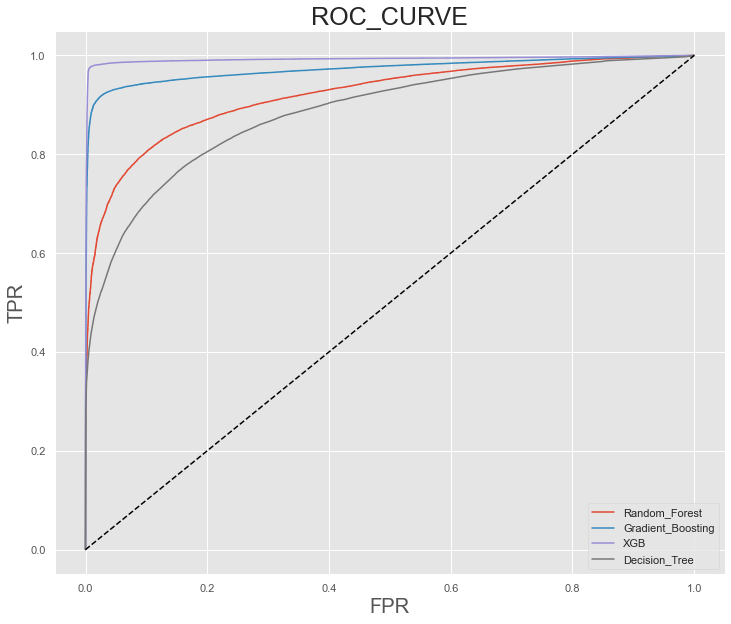

In [1683]:
from matplotlib import style
style.use("ggplot")

plt.figure(figsize=(12,10))

plt.plot(rf_fpr,rf_tpr,label="Random_Forest")
plt.plot(gb_fpr,gb_tpr,label="Gradient_Boosting")
plt.plot(xgb_fpr,xgb_tpr,label="XGB")
plt.plot(dt_fpr,dt_tpr,label="Decision_Tree")
plt.plot([0,1],ls="dashed",color="black")

plt.legend()
plt.title("ROC_CURVE",fontsize=25)
plt.xlabel("FPR",fontsize=20)
plt.ylabel("TPR",fontsize=20)
plt.show()

Conclusion


The Ideal Algorithm for this project is XGBClassifier
The score has been increased after tuning 
Aslo the Roc Curve shows the performs of this particular Classifier compared to others is the better performer 
